**Исследование продаж интернет-магазина «Стримчик»**

**Цель исследования**


В ходе исследования будут изучены имеющиеся данные о продажах компьютерных игр за период с 1980 по 2016 год, в том числе информация о жанрах и игровых платформах, а также результаты продаж в различных регионах мира. Помимо этого, в процессе исследования будут проверены некоторые гипотезы, которые могут помочь бизнесу учитывать различные выявленные закономерности игрового рынка.


**Этапы исследования**


1. Загрузка набора данных и изучение основных сведений об имеющихся данных.
2. Проведение первичной предобработки данных и подготовки датафрейма для исследования (работа с прпусками, дубликатами, изучение категориальных и количественных значений, приведение типов данных в столбцах к корректным типам данных).
3. Проведение исследовательского анализа данных.
4. Выявление актуального периода для последующего изучения продаж в игровом секторе.
5. Выполнение задач по подсчету суммарных продаж игр, сроков функционирования платформ, выявления лидирующих и прибыльных платформ, распределения игр по жанрам, а также изучение влияния оценки пользователей игр на их продажи.
6. Составление портретьв и изучение особенной продаж игр по жанрам и платформам по различным регионам (Северная Америка, Европа, Япония).
7. Выполнение задач по проверке имеющихся гипотез, связанных со средними пользовательскими оценками.
+ средние пользовательские рейтинги платформ Xbox One и PC одинаковые (равны '=')?
+ средние пользовательские рейтинги жанров Action и Sports одинаковые (равны '=')?
7. Подготовка итогового вывода по результатам исследования.


**Описание даных:**


+ Name — название игры
+ Platform — платформа
+ Year_of_Release — год выпуска
+ Genre — жанр игры
+ NA_sales — продажи в Северной Америке (миллионы проданных копий)
+ EU_sales — продажи в Европе (миллионы проданных копий)
+ JP_sales — продажи в Японии (миллионы проданных копий)
+ Other_sales — продажи в других странах (миллионы проданных копий)
+ Critic_Score — оценка критиков (максимум 100)
+ User_Score — оценка пользователей (максимум 10)
+ Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
%matplotlib inline

##### Загрузка данных

###### Загрузка набора данных

In [2]:
#games = pd.read_csv('/datasets/games.csv')
games = pd.read_csv(r'C:\Users\user\games.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


###### Общая информация

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.shape

(16715, 11)

###### Проверка на наличие явных дубликатов

In [5]:
games.duplicated().sum()

0

Дубликатов в наборе данных не имеется

###### Первые выводы

**Первые выводы:**

1. Датафрейм содержит свыше 16 тыс. записей об играх различных жанров, их продажах, оценках и рейтингах. 


2. По итогам первичной загрузки данных и информации выявлено, что необходимо провести работу по предобработке данных в части приведения отдельных столбцов к корретным типам данных.


3. В наборе данных также имеются пропуски. Будет осуществляться работа по восстановлению или удалению пропущенных значений.


4. Дубликатов в датафрейме не имеется.

##### Подготовка данных

###### Приведение названий столбцов к нижнему регистру

In [6]:
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [7]:
games.columns = games.columns.str.lower()

Проведем проверку приведения столбцов к нижнему регистру

In [8]:
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

###### Работа с пропусками

In [9]:
games.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
8328,Pokémon Beach Blank-out Blastoise / Go West Yo...,GBA,2004.0,Misc,0.12,0.05,0.00,0.00,NaN,NaN,NaN
16350,Ultraman Fighting Evolution 0,PSP,2006.0,Fighting,0.00,0.00,0.01,0.00,NaN,NaN,NaN
15382,Tsuyo Kiss 2 Portable,PSP,2010.0,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
3687,Gekikuukan Pro Yakyuu: At the End of the Centu...,PS2,2000.0,Sports,0.00,0.00,0.54,0.00,NaN,NaN,NaN
4991,Marvel Nemesis: Rise of the Imperfects,GC,2005.0,Fighting,0.30,0.08,0.00,0.01,54.0,5.7,T


In [10]:
def check(games):
    l = []
    columns = games.columns
    for col in columns:
        dtypes = games[col].dtypes
        nunique = games[col].nunique()
        sum_nan = games[col].isna().sum()
        percent_nan = games[col].isna().sum()*100/len(games)
        l.append([col, dtypes, nunique, sum_nan, percent_nan])
    games_check = pd.DataFrame(l)
    games_check.columns = ['Столбец', 'Тип данных', 'Уникальные значения', 'Сумма NaN', 'Процент NaN']
    return games_check

check(games).round(2)

,Столбец,Тип данных,Уникальные значения,Сумма NaN,Процент NaN
0,name,object,11559,2,0.01
1,platform,object,31,0,0.00
2,year_of_release,float64,37,269,1.61
3,genre,object,12,2,0.01
4,na_sales,float64,402,0,0.00
5,eu_sales,float64,307,0,0.00
6,jp_sales,float64,244,0,0.00
7,other_sales,float64,155,0,0.00
8,critic_score,float64,82,8578,51.32
9,user_score,object,96,6701,40.09


Количество пропусков в процентах

In [11]:
pd.DataFrame(games.isna().mean().sort_values(ascending=False)).style.format('{:.2%}').background_gradient('coolwarm')

,0
critic_score,51.32%
rating,40.48%
user_score,40.09%
year_of_release,1.61%
name,0.01%
genre,0.01%
platform,0.00%
na_sales,0.00%
eu_sales,0.00%
jp_sales,0.00%


**Методика работы с пропущенными значениями:**

1. В столбце 'name' с наименованием игр имеется два пропуска. Так как строки с пропусками имеют пропуски сразу в названиях игр,  жанрах, оценках критиков, оценках пользователей и рейтинге, восстановить такой объем данных невозможно. Две строки будут удалены.


2. В столбце 'year_of_release' содержится 269 пропусков. Часть пропусков будет восстановлена по условию: если в названии игры содержится год выпуска, то пропуск в строке будет заменен на этот год. Также для игр с одинаковым наименованием (но другой платформой) при наличии пропуска года выпуска заполним его таким же аналогичным годом.  


3. В столбцах 'critic_score', 'user_score' и 'rating' пропущенные значения будут заполнены средним или аналогичным уже имеющимся значением одних и тех же игр, но на другой платформе. Это поможет восполнить некоторую часть пропущенных значений без искажения статистических показателей.


4. В столбце 'user_score' также имеется значение 'tbd' (To Be Determined, т. е. Будет определено). Такое сокращение применяется разработчиками игр когда сделан анонс о том, что игра готовится к выходу, но пока ещё не может быть названа точная дата выхода игры. То есть оценки пользователями невышедшей игры быть не может и произведем замену этого значения на значение NaN. Также приведем столбец к числовому значению для корректной работы по замене части оценок пользователей средним значением по имеющейся оценки игры.

**Работа с пропусками в столбце 'name'**

Выведем и удалим пропуски в столбце с названием игр

In [12]:
games.loc[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [13]:
games = games.dropna(subset=['name']).reset_index(drop=True)

Проведем проверку после удаления пропусков

In [14]:
games.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

**Работа с пропусками в столбце 'year_of_release'**

Выведем пропуски в сотлбце года выпуска игр

In [15]:
year_of_release_isna = games.loc[games['year_of_release'].isna()]
year_of_release_isna

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В столбце имеется 269 пропусков

Посмотрим никальные значения и восстановим часть значеий по условию, если если в названии игры содержится год выпуска, то пропуск в строке с годом выпуска будет заменен на указанный в наименовании игры год

In [16]:
year_of_release_isna['name'].unique()

array(['Madden NFL 2004', 'FIFA Soccer 2004',
       'LEGO Batman: The Videogame', 'wwe Smackdown vs. Raw 2006',
       'Space Invaders', 'Rock Band',
       "Frogger's Adventures: Temple of the Frog",
       'LEGO Indiana Jones: The Original Adventures', 'Call of Duty 3',
       'Call of Duty: Black Ops', 'Triple Play 99', 'Adventure', 'Combat',
       'LEGO Harry Potter: Years 5-7', 'NASCAR Thunder 2003',
       'Hitman 2: Silent Assassin', 'Legacy of Kain: Soul Reaver',
       'Donkey Kong Land III', 'Air-Sea Battle', 'Suikoden III',
       'Wheel of Fortune', 'Yakuza 4', 'Namco Museum', 'Rhythm Heaven',
       'The Lord of the Rings: War in the North', 'Madden NFL 07',
       'MLB SlugFest 20-03', 'Shaun White Snowboarding',
       'PES 2009: Pro Evolution Soccer', 'WarioWare: Twisted!',
       'Madden NFL 11', 'Test Drive Unlimited 2',
       'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe',
       'Monster Hunter 2', 'Metal Gear Solid 2: Substance',
       'Advanc

In [17]:
games['year_of_release'] = games['year_of_release'].mask(games['name'].str.contains('99'), '1999') 
games['year_of_release'] = games['year_of_release'].mask(games['name'].str.contains('2002'), '2002')
games['year_of_release'] = games['year_of_release'].mask(games['name'].str.contains('2003'), '2003')
games['year_of_release'] = games['year_of_release'].mask(games['name'].str.contains('2004'), '2004')
games['year_of_release'] = games['year_of_release'].mask(games['name'].str.contains('07'), '2007')
games['year_of_release'] = games['year_of_release'].mask(games['name'].str.contains('2009'), '2009')
games['year_of_release'] = games['year_of_release'].mask(games['name'].str.contains('06'), '2006')
games['year_of_release'] = games['year_of_release'].mask(games['name'].str.contains('11'), '2011')
games['year_of_release'] = games['year_of_release'].mask(games['name'].str.contains('2013'), '2013')
games['year_of_release'] = games['year_of_release'].mask(games['name'].str.contains('2005'), '2005')
games['year_of_release'] = games['year_of_release'].mask(games['name'].str.contains('2K6'), '2006')
games['year_of_release'] = games['year_of_release'].mask(games['name'].str.contains('2K8'), '2008')

Проведем проверку произведенной замены

In [18]:
games.isna().sum()

name                  0
platform              0
year_of_release     245
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [19]:
games['year_of_release'].isna().sum()

245

Проверим выборочно некоторые заполненные строки

In [20]:
games.iloc[[183, 377, 475, 16373]]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,2004,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,2004,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
475,wwe Smackdown vs. Raw 2006,PS2,2006,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
16373,Starry ? Sky: After Autumn,PSP,2011.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN


Количество пропусков немного сократилось.

Продолжим восстановление пропусков и для игр с одинаковым наименованием, при наличии пропуска года выпуска, заполним его таким же аналогичным годом.  

In [21]:
# games['year_of_release'] = games.groupby(['name'])['year_of_release'].transform(lambda x: x.ffill())
games['year_of_release'] = games.groupby('name')['year_of_release'].transform('first')

Посмотрим оставшиеся пропуски в столбце после очередного заполнения

In [22]:
games.loc[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
627,Rock Band,X360,None,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,None,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
804,Rock Band,Wii,None,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
1141,Rock Band,PS3,None,Misc,0.99,0.41,0.00,0.22,92.0,8.4,T
1505,Adventure,2600,None,Adventure,1.21,0.08,0.00,0.01,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16275,Homeworld Remastered Collection,PC,None,Strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+
16286,Shorts,DS,None,Platform,0.01,0.00,0.00,0.00,NaN,tbd,E10+
16346,Agarest Senki: Re-appearance,PS3,None,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16456,Hakuouki: Shinsengumi Kitan,PS3,None,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Проверим проведенную замену

In [23]:
games.isna().sum()

name                  0
platform              0
year_of_release     137
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Проверим также выборочно некоторые заполненные строки

In [24]:
games.iloc [[456, 609, 16375, 16524]]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
456,LEGO Batman: The Videogame,Wii,2008.0,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
609,Space Invaders,2600,1994.0,Shooter,2.36,0.14,0.0,0.03,NaN,NaN,NaN
16375,Tiger Woods PGA Tour 2005,PC,2005,Sports,0.00,0.01,0.0,0.00,91.0,4.5,E
16524,Dungeons 2,PS4,2016.0,Role-Playing,0.01,0.00,0.0,0.00,61.0,7.9,T


Количество пропусков заметно уменьшилось. Оставшиеся пропуски корректно восстановить невозможно, поэтому удалим их.

In [25]:
games = games.dropna(subset=['year_of_release']).reset_index(drop=True)

In [26]:
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8496
user_score         6637
rating             6704
dtype: int64

Пропуски в столбце удалены окончательно.

**Работа с пропусками в столбце 'critic_score'**

In [27]:
games.loc[games['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16571,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16572,LMA Manager 2007,X360,2007,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16573,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16574,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [28]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [29]:
games.loc[games['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16571,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16572,LMA Manager 2007,X360,2007,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16573,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16574,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Оставшиеся пропуски корректно заполнить невозможно и удалять такое большое количество записей не нужно. Оставим без удаления и восполнения.

**Работа с пропусками в столбце 'user_score'**

In [30]:
games.loc[games['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16571,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16572,LMA Manager 2007,X360,2007,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16573,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16574,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [31]:
games['critic_score'].round(1).unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

**Обработка значения 'tbd' в столбце 'user_score' и его замена на значение NaN**

In [32]:
games.loc[(games['user_score'] == 'tbd')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
644,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
715,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16556,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16558,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16559,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16565,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [33]:
games['user_score'] = games['user_score'].replace('tbd', np.nan)
games['user_score'] = games['user_score'].astype('float')

In [34]:
games.loc[games['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16571,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16572,LMA Manager 2007,X360,2007,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16573,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16574,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


За счет преобразования количество пропусков увеличилось. Продолжим частично восполнить значения в этом столбце по аналогии с предыдущим столбцом средним значением по названию игр.

In [35]:
games.loc[games['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16571,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16572,LMA Manager 2007,X360,2007,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16573,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16574,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Количество пропусков сократилось с 9032 до 7933. Оставшиеся пропуски корректно заполнить невозможно и удалять такое большое количество записей не нужно. Оставим без удаления и восполнения.

**Работа с пропусками в столбце 'rating'**

In [36]:
games.loc[games['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16571,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16572,LMA Manager 2007,X360,2007,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16573,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16574,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [37]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [38]:
games['rating'] = games.groupby('name')['rating'].transform('first')

Проверка сумм пропусков

In [39]:
matching_ratings = games.loc[(games['rating'].isna()) & (games['critic_score'].isna()) & (games['user_score'].isna())]
print(f'Суммы пропусков с стобцах рейтинга, оценки критиков и пользователей:', matching_ratings.isna().sum())

Суммы пропусков с стобцах рейтинга, оценки критиков и пользователей: name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       6205
user_score         6205
rating             6205
dtype: int64


Суммы пропусков совпадают

In [40]:
games.loc[games['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,None
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,None
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,None
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,None
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...
16571,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,None
16572,LMA Manager 2007,X360,2007,Sports,0.00,0.01,0.00,0.00,NaN,NaN,None
16573,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,None
16574,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,None


Оставшиеся пропуски корректно заполнить невозможно и удалять такое большое количество записей не нужно. Оставим без удаления и восполнения.

###### Работа с неявными дубликатами

In [41]:
print(games['name'].unique())
print()
print(games['platform'].unique())
print()
print(games['genre'].unique())
print()
print(games['rating'].unique())
print()
print(games['user_score'].round(1).unique())
print()
print(games['critic_score'].round(1).unique())

['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']

['E' None 'M' 'T' 'E10+' 'K-A' 'EC' 'RP']

[8.  nan 8.3 8.5 6.6 8.4 8.6 7.7 6.3 7.4 8.2 9.  7.9 8.1 8.7 7.1 3.4 5.3
 4.8 3.2 8.9 6.4 7.8 7.5 2.6 7.2 9.2 7.  7.3 4.3 7.6 5.7 5.  9.1 6.5 8.8
 6.9 9.4 6.8 6.1 6.7 5.4 4.  4.9 4.5 9.3 6.2 4.2 6.  3.7 4.1 5.8 5.6 5.5
 4.4 4.6 5.9 3.9 3.1 2.9 5.2 3.3 4.7 5.1 3.5 2.5 1.9 3.  2.7 2.2 2.  9.5
 2.1 3.6 2.8 1.8 3.8 0.  1.6 9.6 2.4 1.7 1.1 0.3 1.5 0.7 1.2 2.3 0.5 1.3
 0.2 0.6 1.4 0.9 1.  9.7]

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 

Неявных дубликатов также не имеется, так как одинаковые названия игр, наименования платформ и жанры - это уникальные значения и категории, которые не являются дубликатами.

###### Работа с типами данных

In [42]:
games.dtypes

name                object
platform            object
year_of_release     object
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

**Методика работы с типами данных:**

1. Столбцы 'platform', 'genre' необходимо привести к типу данных 'category', так как данные столбцы содержат определенное количество постоянно повторяющихся значений (название платформы, жанр игры).


2. Столбец 'year_of_release' будет приведен к формату int (целочисленное значение), так как содержит только год и приводить к формату datetime не будем.


3. Столбцы c продажами в разных регионах мира ('na_sales', 'eu_sales', 'jp_sales', 'other_sales'), а также столбцы 'user_score' и 'critic_score' с оценками пользователей и критиков приведем к формату 'float' к числовым значениям с плавающей запятой.


In [43]:
games[['platform', 'genre', 'rating']] = games[['platform', 'genre', 'rating']].astype('category')

In [44]:
games['year_of_release'] = games['year_of_release'].astype('int')

Проведем проверку выполненных преобразований

In [45]:
games.dtypes

name                 object
platform           category
year_of_release       int32
genre              category
na_sales            float64
eu_sales            float64
jp_sales            float64
other_sales         float64
critic_score        float64
user_score          float64
rating             category
dtype: object

In [46]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Приведение к необходимым типам данных произведено успешно

###### Суммарные продажи игр

Подсчет суммарных продаж игр с добавлением столбца

In [47]:
games['all_sales'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis=1)
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [48]:
games.dtypes

name                 object
platform           category
year_of_release       int32
genre              category
na_sales            float64
eu_sales            float64
jp_sales            float64
other_sales         float64
critic_score        float64
user_score          float64
rating             category
all_sales           float64
dtype: object

In [49]:
print(f'Общая сумма продаж составила:', games['all_sales'].sum().round(2), 'млн. копий')

Общая сумма продаж составила: 8875.07 млн. копий


**Выводы по итогам предобработки данных:**

1. В наборе данных проведена работа с пропусками. Часть пропущеных значений в столбце с годом выхода игр удалось восстановить по условию: если в названии игры содержался год выпуска, то пропуск в строке был заменен на этот год. В столбце 'user_score' имелось значение 'tbd' (To Be Determined, т. е. Будет определено). Такое сокращение применяется разработчиками игр когда сделан анонс о том, что игра готовится к выходу, но пока ещё не может быть названа точная дата выхода игры. То есть оценки пользователями невышедшей игры быть не может. В связи с этим, была произведена замена этого значения на значение NaN. 


2. Среди основных причин наличия пропусков можно выделить самые разные. Например, технические, связанные с ошибками базы данных или ошибками при выгрузке из базы данных. Также есть субъективные причины пропусков, при которых частью пользователей или критиков не было проставлено оценок в связи с тем, что игра только анонсирована и еще не вышла, или необязательностью проставления рейтинга. Пропуски в столбцах с продажами в определенном регионе могут означать отсутствие продаж.


3. Также была проведена работа по поиску неявных дубликатов. Неявных дубликатов в наборе данных не имеется, так как повтоляющиеся одинаковые названия игр, наименования платформ и жанры - это уникальные значения и категории, которые не являются дубликатами.


4. В ходе предобработки данных была проведена и работа по приведению стлбцов в наборе данных к корректному типу. Столбцы 'platform', 'genre' были приведены к типу данных 'category', так как данные столбцы содержат определенное количество постоянно повторяющихся значений (название платформы, жанр игры). Столбец 'year_of_release' приведен к формату int (целочисленное значение), так как содержит только год и приводить к формату datetime необходимости нет и без него можно построить временной ряд по годам. Столбцы c продажами в разных регионах мира ('na_sales', 'eu_sales', 'jp_sales', 'other_sales'), а также столбцы 'user_score' и 'critic_score' с оценками пользователей и критиков приведены к формату 'float' к числовым значениям с плавающей запятой. 


5. В завершении была подсчитана общая сумма продаж, которая по всем регионам составила 8875.07 миллионов копий.

##### Исследовательский анализ данных

###### Выпуск игр по годам

In [50]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


**Общий суммарный выпуск игр по годам**

In [51]:
games['year_of_release'].value_counts().sort_index(ascending=True)

year_of_release
1980      14
1981      44
1982      37
1983      19
1984      16
1985      17
1986      24
1987      16
1988      14
1989      21
1990      15
1991      50
1992      52
1993      61
1994     149
1995     211
1996     273
1997     290
1998     384
1999     365
2000     344
2001     483
2002     827
2003     742
2004     776
2005     927
2006    1021
2007    1283
2008    1410
2009    1447
2010    1209
2011    1224
2012     657
2013     547
2014     551
2015     581
2016     475
Name: count, dtype: int64

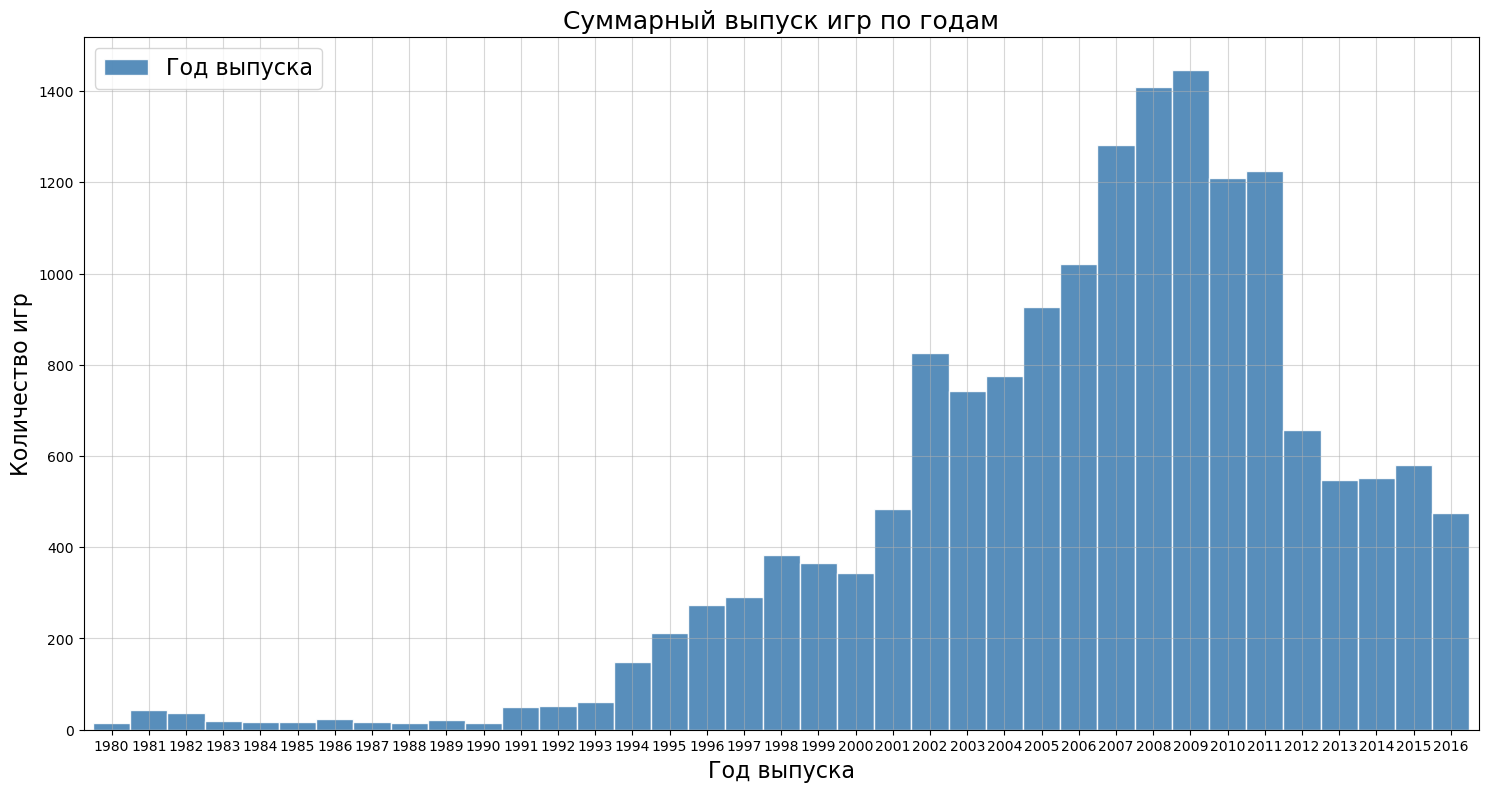

In [52]:
games['year_of_release'].value_counts().sort_index(ascending=True).plot(
    kind='bar', figsize=(18, 9), color='steelblue', ec='white', alpha=0.9, width=1)
plt.title('Суммарный выпуск игр по годам', fontsize=18)
plt.xlabel('Год выпуска', fontsize=16)
plt.ylabel('Количество игр', fontsize=16)
plt.legend(['Год выпуска'], loc='upper left', fontsize=16)
plt.xticks(rotation=0)
plt.grid(alpha=0.5)
plt.show(close=None, block=None)

Суммарные продажи игр по платформам

C:\Users\user\AppData\Local\Temp\ipykernel_8020\1792328972.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  games_platform_sales = games.groupby('platform')['all_sales'].sum().sort_values(ascending=False)


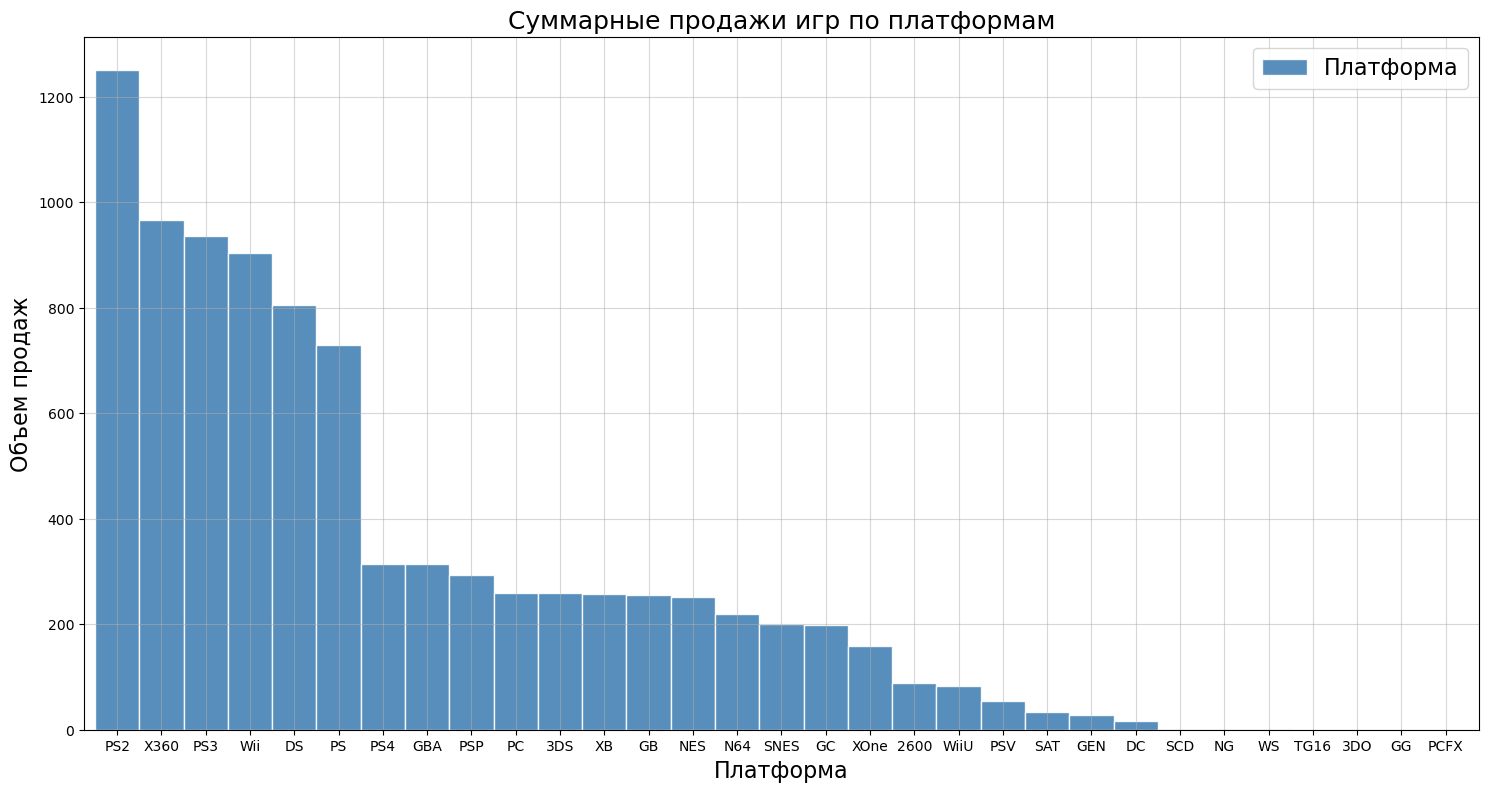

In [53]:
games_platform_sales = games.groupby('platform')['all_sales'].sum().sort_values(ascending=False)
games_platform_sales.plot(kind='bar', figsize=(18, 9), color='steelblue', ec='white', alpha=0.9, width=1)
plt.title('Суммарные продажи игр по платформам', fontsize=18)
plt.xlabel('Платформа', fontsize=16)
plt.ylabel('Объем продаж', fontsize=16)
plt.legend(['Платформа'], loc='upper right', fontsize=16)
plt.xticks(rotation=0)
plt.grid(alpha=0.5)
plt.show(close=None, block=None)

Доля каждой платформы в общем объеме продаж

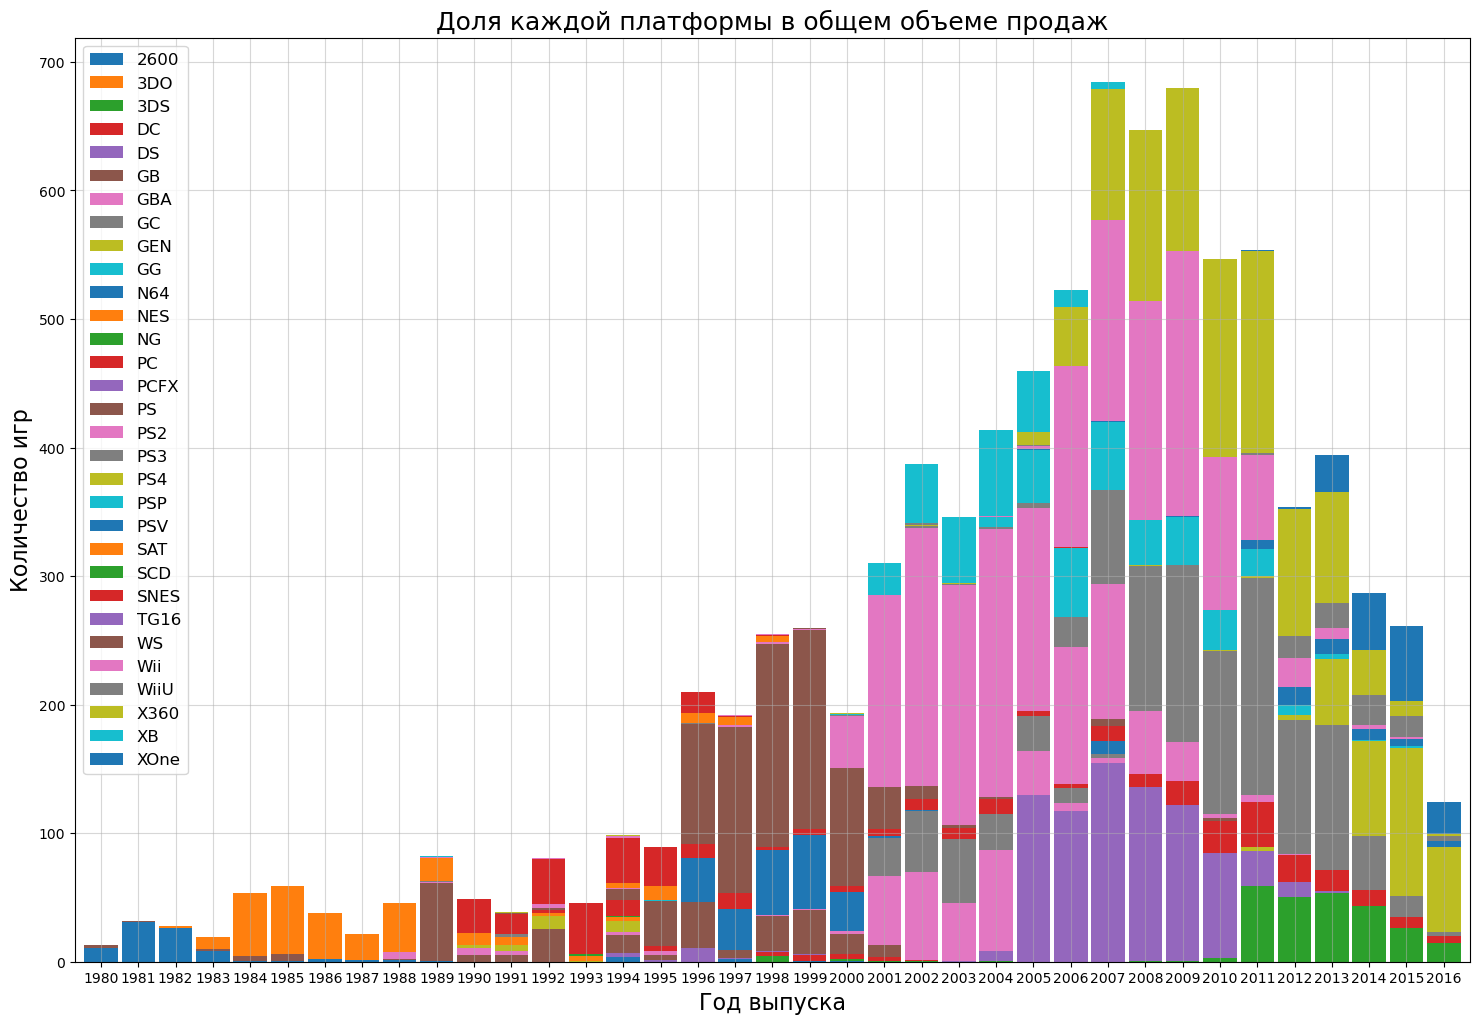

In [54]:
games.pivot_table(index='year_of_release', 
                  columns = 'platform', 
                  values = 'all_sales', 
                  aggfunc = 'sum', observed=False).sort_index(ascending=True).plot(
    kind='bar', stacked=True, figsize=(18, 12), width=0.9) 
plt.title('Доля каждой платформы в общем объеме продаж', fontsize=18)
plt.xlabel('Год выпуска', fontsize=16)
plt.ylabel('Количество игр', fontsize=16)
plt.xticks(rotation=0)
plt.legend(loc='upper left', fontsize=12)
plt.grid(alpha=0.5)
plt.show(close=None, block=None)

**Выводы:**

Суммарный выпуск игр можно поделить на несколько периодов. Перый с 1980 по 1993 - начальный этап развития игровой индустрии. Этап характеризуется малым количеством выпущенных игр с 14 в 1980 до 61 в 1993 году. Далее следует этап интенсивного роста с 1993 года до 2009 года. В этот период мы можем наблюдать практически ежегодный интенсивный рост, количество выпущенных игр уже исчисляется сотнями и тысячами со 149 в 1994 году до 1447 в 2009 году (за 16 лет рост в 10 раз). И третий этап, который начался в 2010 году и характеризуется ежегодным спадом.

В числе самых продаваемых платформ явно выделяются шесть следующих пять наиболее явно выраженных лидеров - это PS2 (Sony), PS3 (Sony), DS (Nintendo), Wii (Nintendo) и X360 (Microsoft). Эти же пять платформ являются и лидерами не только по объемам продаж, но и поколичеству выпущенных игр. Динамика показывает, что эти пять платформ лидируют в последние пять лет игровом рынке и составляют подавляющее большинство. Большинство платформ в течение изучаемого периода прекращали свое существование или сменялись наиболее новой версией (например: PS --> PS2 --> PS3).


###### Определение актуального периода

Актуальный период определим за последние пять лет с 2014 по 2016 год включительно, так как бизнес обычно опирается на небольшие временные интервалы, чтобы соответствовать актуальным трендам. 

Подготовим срез набора данных games, содержащего только данные за эти годы.

In [55]:
slice_games = games.loc[games['year_of_release'] >= 2014]
slice_games.head().reset_index(drop=True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
1,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
2,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
3,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
4,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


In [56]:
slice_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1607 entries, 31 to 16575
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             1607 non-null   object  
 1   platform         1607 non-null   category
 2   year_of_release  1607 non-null   int32   
 3   genre            1607 non-null   category
 4   na_sales         1607 non-null   float64 
 5   eu_sales         1607 non-null   float64 
 6   jp_sales         1607 non-null   float64 
 7   other_sales      1607 non-null   float64 
 8   critic_score     709 non-null    float64 
 9   user_score       875 non-null    float64 
 10  rating           981 non-null    category
 11  all_sales        1607 non-null   float64 
dtypes: category(3), float64(7), int32(1), object(1)
memory usage: 126.0+ KB


###### Сроки функционирования платформ

In [57]:
aggfuncs = ['min', 'max']
life_platform_games = games.pivot_table(
    index='platform', values='year_of_release', aggfunc=aggfuncs, observed=False).sort_index(ascending=False)
life_platform_games['life_game_release'] = life_platform_games['max'] - life_platform_games['min']
life_platform_games.sort_values(by='life_game_release', ascending=False)

,min,max,life_game_release
,year_of_release,year_of_release,
platform,,,
PS2,1980,2015,35
PS4,1982,2016,34
PSP,1982,2015,33
XB,1980,2012,32
GC,1980,2012,32
PS,1980,2011,31
Wii,1985,2016,31
DS,1984,2015,31


In [58]:
life_platform_games['life_game_release'].describe()

count    31.000000
mean     18.580645
std      11.563662
min       0.000000
25%      12.000000
50%      20.000000
75%      31.000000
max      35.000000
Name: life_game_release, dtype: float64

In [59]:
slice_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1607 entries, 31 to 16575
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             1607 non-null   object  
 1   platform         1607 non-null   category
 2   year_of_release  1607 non-null   int32   
 3   genre            1607 non-null   category
 4   na_sales         1607 non-null   float64 
 5   eu_sales         1607 non-null   float64 
 6   jp_sales         1607 non-null   float64 
 7   other_sales      1607 non-null   float64 
 8   critic_score     709 non-null    float64 
 9   user_score       875 non-null    float64 
 10  rating           981 non-null    category
 11  all_sales        1607 non-null   float64 
dtypes: category(3), float64(7), int32(1), object(1)
memory usage: 126.0+ KB


###### Выбор лидирующих и прибыльных платформ

**Платформы лидеры по количеству игр**

In [60]:
slice_games['platform'].value_counts().round(2).to_frame().style.format('{:.0f}').background_gradient(cmap='Blues')

,count
platform,
PS4,344
PSV,274
PS3,219
XOne,206
3DS,201
PC,149
X360,113
WiiU,71
PSP,16


C:\Users\user\AppData\Local\Temp\ipykernel_8020\2044195117.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  games_platform_sales = slice_games.groupby('platform')['all_sales'].sum().sort_values(ascending=False)


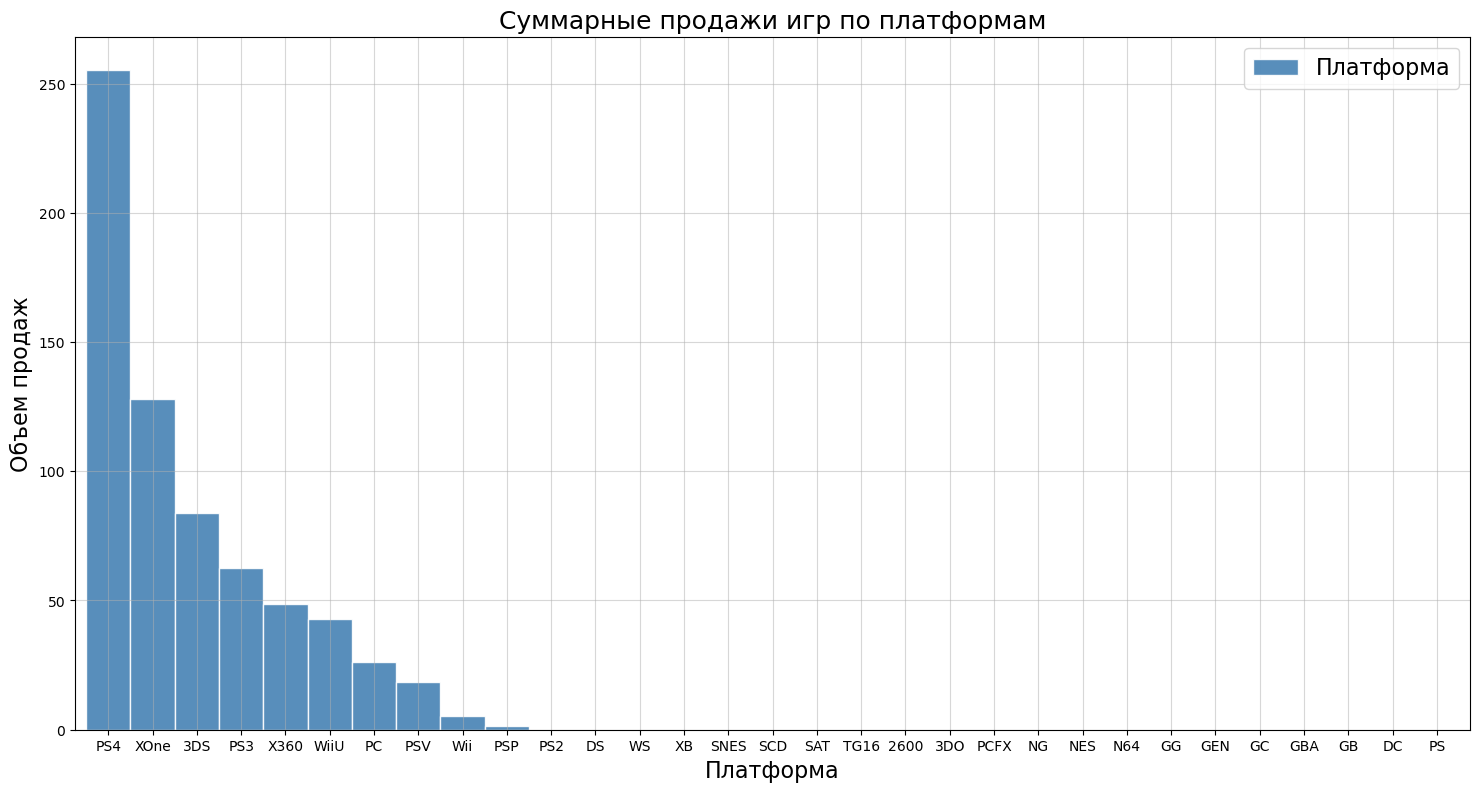

In [61]:
games_platform_sales = slice_games.groupby('platform')['all_sales'].sum().sort_values(ascending=False)
games_platform_sales.plot(kind='bar', figsize=(18, 9), color='steelblue', ec='white', alpha=0.9, width=1)
plt.title('Суммарные продажи игр по платформам', fontsize=18)
plt.xlabel('Платформа', fontsize=16)
plt.ylabel('Объем продаж', fontsize=16)
plt.legend(['Платформа'], loc='upper right', fontsize=16)
plt.xticks(rotation=0)
plt.grid(alpha=0.5)
plt.show(close=None, block=None)

**Платформы лидеры по объемам продаж**

In [62]:
sales_liders = slice_games.groupby('platform')['all_sales'].sum().sort_values(ascending=False)
sales_liders.round(2).to_frame().style.format('{:.1f}').background_gradient(cmap='Blues')

C:\Users\user\AppData\Local\Temp\ipykernel_8020\2251352865.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_liders = slice_games.groupby('platform')['all_sales'].sum().sort_values(ascending=False)


,all_sales
platform,
PS4,255.3
XOne,128.1
3DS,83.8
PS3,62.6
X360,48.6
WiiU,42.9
PC,26.0
PSV,18.6
Wii,5.1


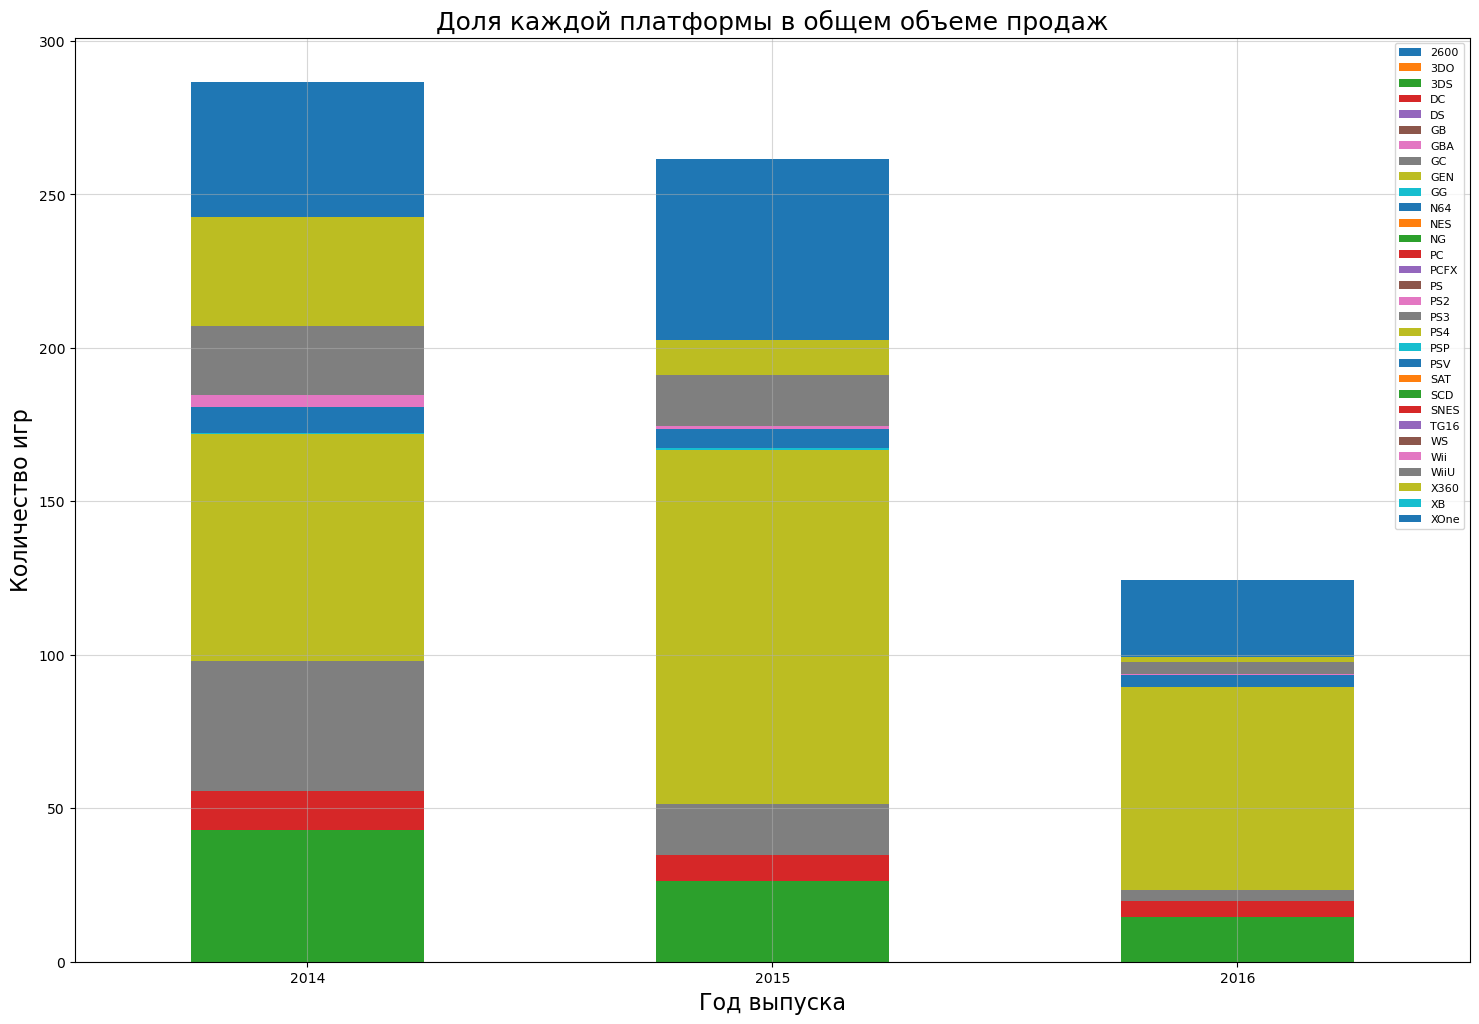

In [63]:
slice_games.pivot_table(index='year_of_release', 
                  columns = 'platform', 
                  values = 'all_sales', 
                  aggfunc = 'sum', observed=False).sort_index(ascending=True).plot(
    kind='bar', stacked=True, figsize=(18, 12)) 
plt.title('Доля каждой платформы в общем объеме продаж', fontsize=18)
plt.xlabel('Год выпуска', fontsize=16)
plt.ylabel('Количество игр', fontsize=16)
plt.xticks(rotation=0)
plt.legend(loc='upper right', fontsize=8)
plt.grid(alpha=0.5)
plt.show(close=None, block=None)

**Определяем пять лидеров по лучшим продажам за 2016 год.**

In [64]:
liders_last_year = slice_games.loc[(games['year_of_release'] == 2016)]

platform_last_year = liders_last_year.groupby('platform')['all_sales'].count().sort_values(ascending=False)
platform_last_year.round(2).to_frame().style.format('{:.1f}').background_gradient(cmap='Blues')

C:\Users\user\AppData\Local\Temp\ipykernel_8020\1001485016.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  platform_last_year = liders_last_year.groupby('platform')['all_sales'].count().sort_values(ascending=False)


,all_sales
platform,
PS4,154.0
PSV,84.0
XOne,80.0
PC,50.0
3DS,44.0
PS3,38.0
X360,13.0
WiiU,11.0
Wii,1.0


**Выводы:**

1. На данном рынке можно выделить шесть лидирующих платформ как по количеству игр, так и по объемам продаж: PS3,  PS4, PSV, 3DS, WiiU и X360 трех производителей - Sony, Nintendo и Microsoft. Таким образом, мы выявили закономерность о том, что лидируют три производителя платформ и они постоянно совершенствуют свою продукцию и выпускают на рынок новые версии платформ. 


2. Также заметно за последние годы выросла платформа PC и это связано с развитием игровой индустрии, игровых сервисов для платформы персональных компьютеров, а также развитием доступа в Интернет. Эту перспективную платформу также нельзя упускать из внимания.Поэтому в числе актуальным платформ выберем всего семь платформ.


3. Несмотря на это, были определены пять лидеров платформ по критерию наибольшего объема продаж за последний 2016 год. Это платформы - PS4 (Sony), PSV (Sony), XOne (Microsoft), PC и 3DS (Nintendo).  

In [65]:
actual_platform = ['PS4', 'PSV', 'XOne', 'PC', '3DS']
slice_games = slice_games.loc[slice_games.apply(lambda x: x['platform'] in actual_platform, axis=1)]
slice_games.head().reset_index(drop=True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
1,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
2,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
3,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
4,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


In [66]:
slice_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1174 entries, 31 to 16575
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             1174 non-null   object  
 1   platform         1174 non-null   category
 2   year_of_release  1174 non-null   int32   
 3   genre            1174 non-null   category
 4   na_sales         1174 non-null   float64 
 5   eu_sales         1174 non-null   float64 
 6   jp_sales         1174 non-null   float64 
 7   other_sales      1174 non-null   float64 
 8   critic_score     596 non-null    float64 
 9   user_score       637 non-null    float64 
 10  rating           686 non-null    category
 11  all_sales        1174 non-null   float64 
dtypes: category(3), float64(7), int32(1), object(1)
memory usage: 92.6+ KB


In [67]:
slice_games['platform'].value_counts()

platform
PS4     344
PSV     274
XOne    206
3DS     201
PC      149
PS3       0
XB        0
X360      0
WiiU      0
Wii       0
WS        0
TG16      0
SNES      0
SCD       0
SAT       0
PSP       0
2600      0
PS2       0
3DO       0
PCFX      0
NG        0
NES       0
N64       0
GG        0
GEN       0
GC        0
GBA       0
GB        0
DS        0
DC        0
PS        0
Name: count, dtype: int64

###### График «ящик с усами» по глобальным продажам

Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам.

C:\Users\user\AppData\Local\Temp\ipykernel_8020\3211689605.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(data=slice_games, x='all_sales', y='platform', orient='h', showfliers=False,


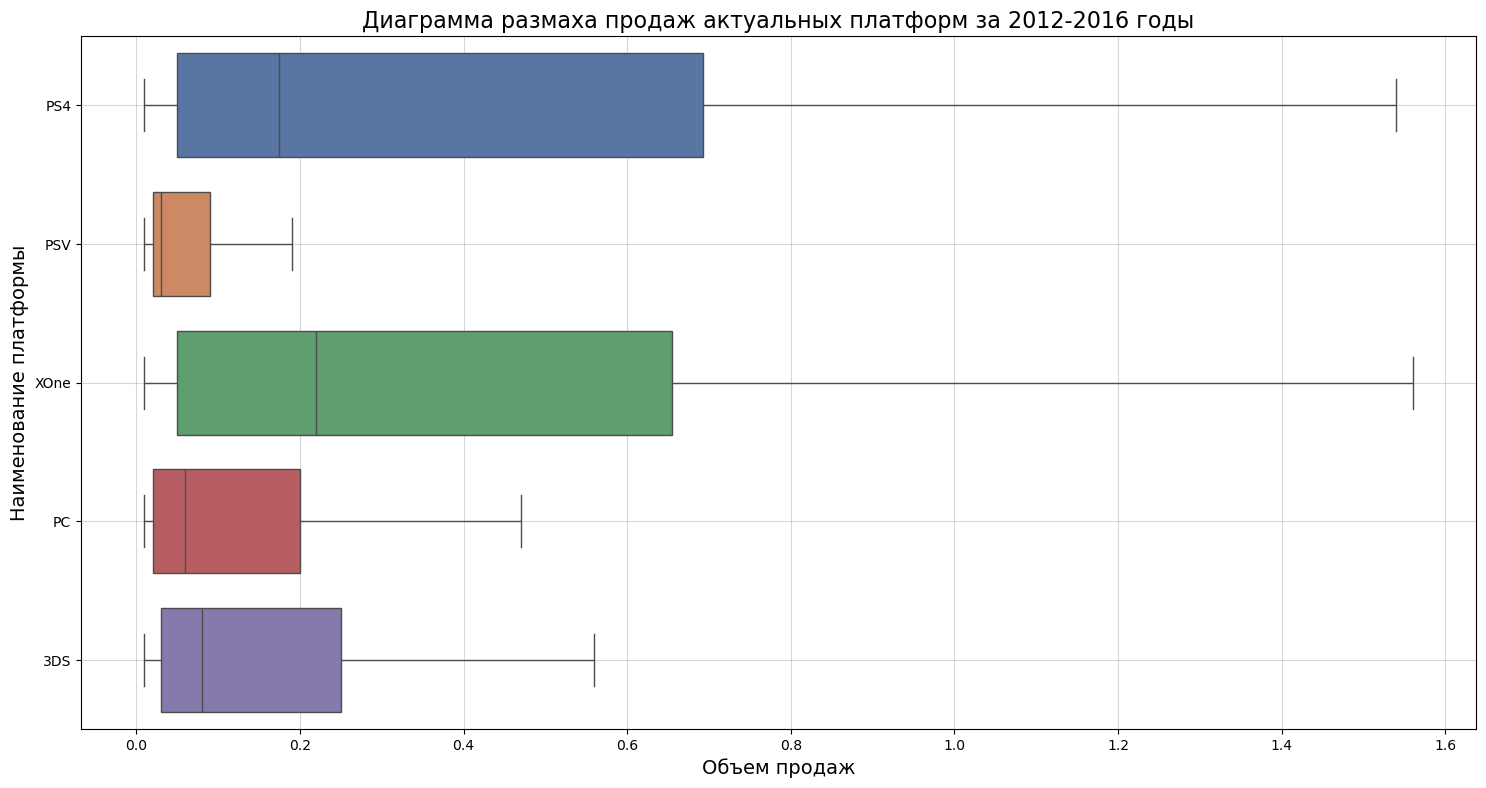

In [68]:
plt.figure(figsize=(18, 9))
boxplot = sns.boxplot(data=slice_games, x='all_sales', y='platform', orient='h', showfliers=False, 
    order=['PS4', 'PSV', 'XOne', 'PC', '3DS'], width=0.75, palette='deep')
boxplot.axes.set_title('Диаграмма размаха продаж актуальных платформ за 2012-2016 годы', fontsize=16)
boxplot.set_xlabel('Объем продаж', fontsize=14)
boxplot.set_ylabel('Наименование платформы', fontsize=14)
plt.grid(alpha=0.5)
plt.show(close=None, block=None)

**Вывод:**

На графике видно, что в объмах продаж свыше миллиона копий можно выделить две платформы: XOne и PS4. Медиана продаж у этих платформ находится на уровне 0.2. Остальные платформы уступают как по общим, так и по средним объемам продаж.  

###### Влияние продаж на отзывы пользователей и критиков

**Корреляция между продажами и отзывами пользователей**

In [69]:
slice_games['all_sales'].corr(slice_games['user_score'])

-0.057403506951942115

**Диаграмма рассеяния общего объема продаж и оценок пользователей**

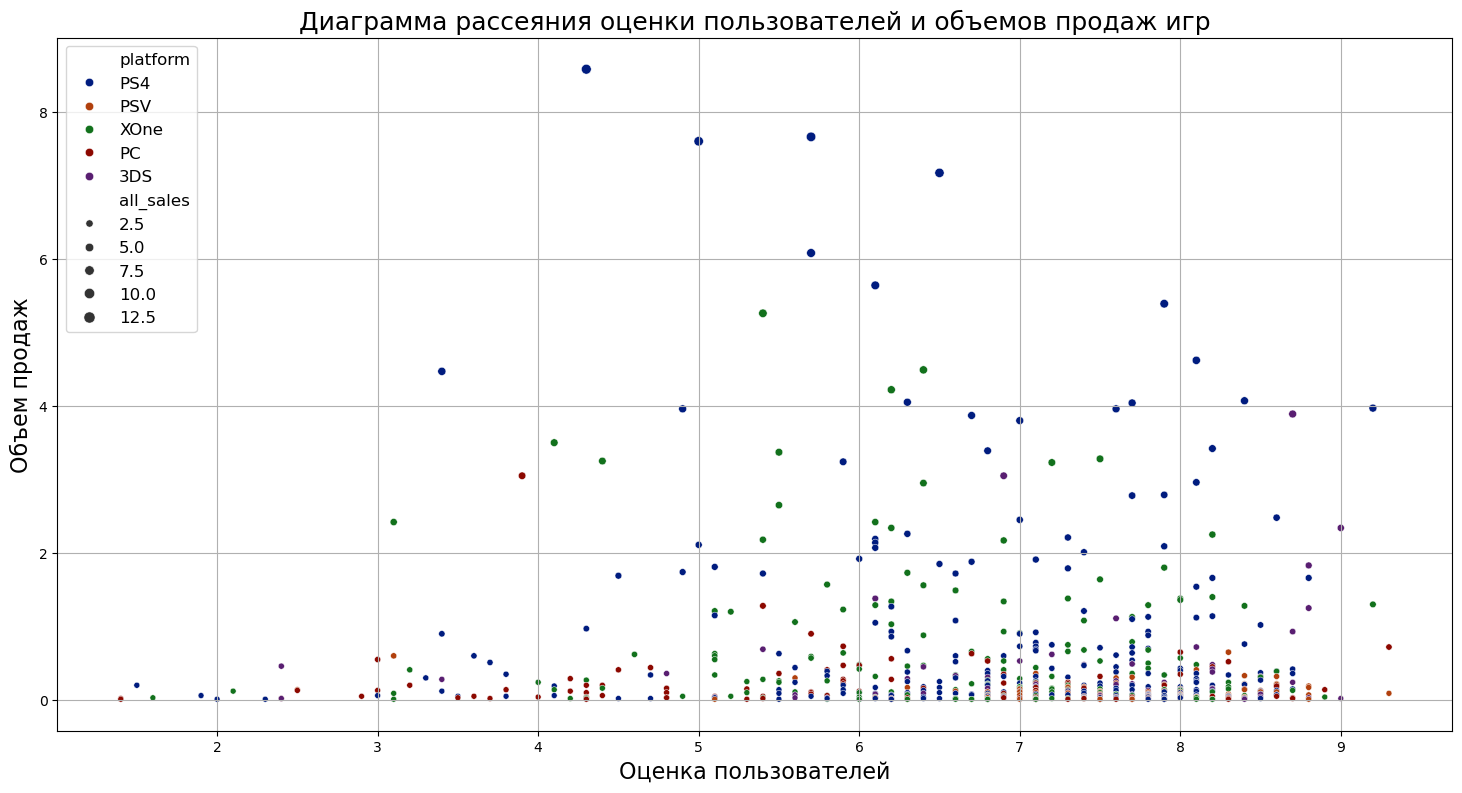

In [70]:
plt.figure(figsize=(18, 9))
sns.scatterplot(data=slice_games, x='user_score', y='all_sales', palette='dark', size='all_sales', hue ='platform',
                hue_order=['PS4', 'PSV', 'XOne', 'PC', '3DS'])
plt.title('Диаграмма рассеяния оценки пользователей и объемов продаж игр', fontsize=18)
plt.xlabel('Оценка пользователей', fontsize=16)
plt.ylabel('Объем продаж', fontsize=16)
plt.legend(loc='upper left', fontsize=12)
plt.grid()
plt.show(close=None, block=None)

**Диаграммы рассеяния общего объема продаж и оценок пользователей по каждой актуальной платформе**

C:\Users\user\AppData\Local\Temp\ipykernel_8020\179459926.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=sales_ps4, x='user_score', y='all_sales', size='all_sales', palette='deep')


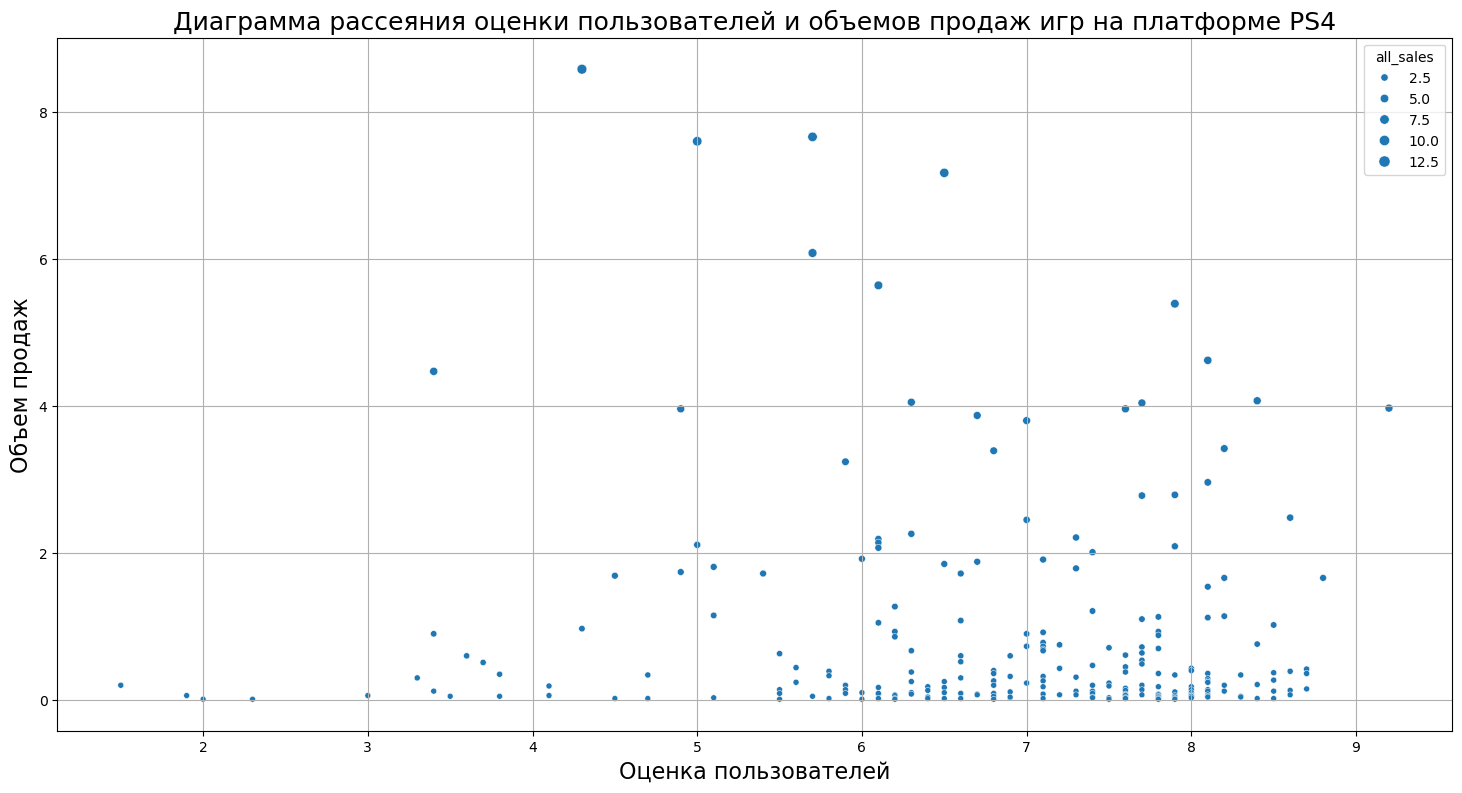

In [71]:
sales_ps4 = slice_games.loc[slice_games['platform'] == 'PS4']
plt.figure(figsize=(18, 9))
sns.scatterplot(data=sales_ps4, x='user_score', y='all_sales', size='all_sales', palette='deep')
plt.title('Диаграмма рассеяния оценки пользователей и объемов продаж игр на платформе PS4', fontsize=18)
plt.xlabel('Оценка пользователей', fontsize=16)
plt.ylabel('Объем продаж', fontsize=16)
plt.grid()
plt.show(close=None, block=None)

C:\Users\user\AppData\Local\Temp\ipykernel_8020\101459768.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=sales_ps5, x='user_score', y='all_sales', size='all_sales', palette='deep')


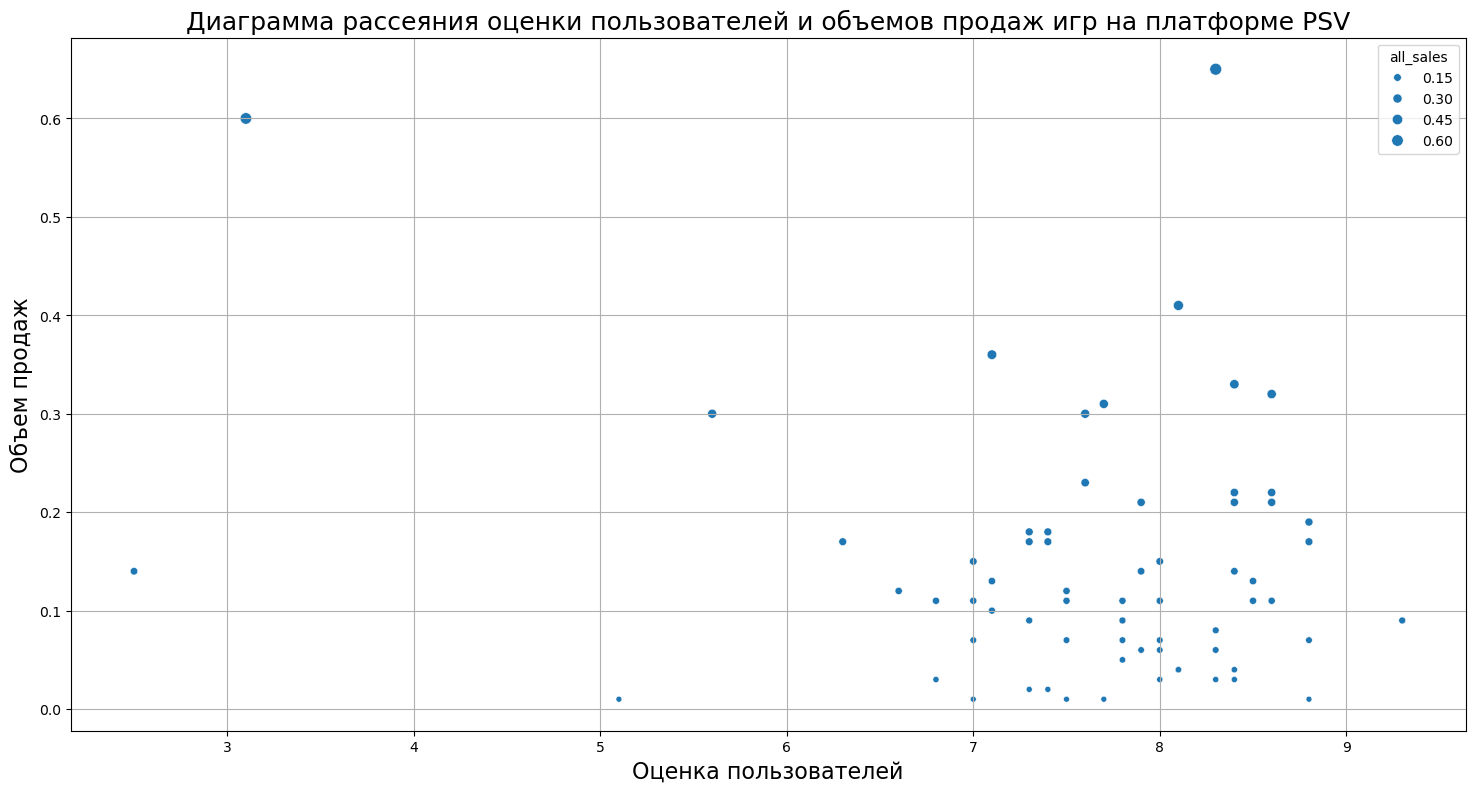

In [72]:
sales_ps5 = slice_games.loc[slice_games['platform'] == 'PSV']
plt.figure(figsize=(18, 9))
sns.scatterplot(data=sales_ps5, x='user_score', y='all_sales', size='all_sales', palette='deep')
plt.title('Диаграмма рассеяния оценки пользователей и объемов продаж игр на платформе PSV', fontsize=18)
plt.xlabel('Оценка пользователей', fontsize=16)
plt.ylabel('Объем продаж', fontsize=16)
plt.grid()
plt.show(close=None, block=None)

C:\Users\user\AppData\Local\Temp\ipykernel_8020\3645216042.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=sales_3ds, x='user_score', y='all_sales', size='all_sales', palette='deep')


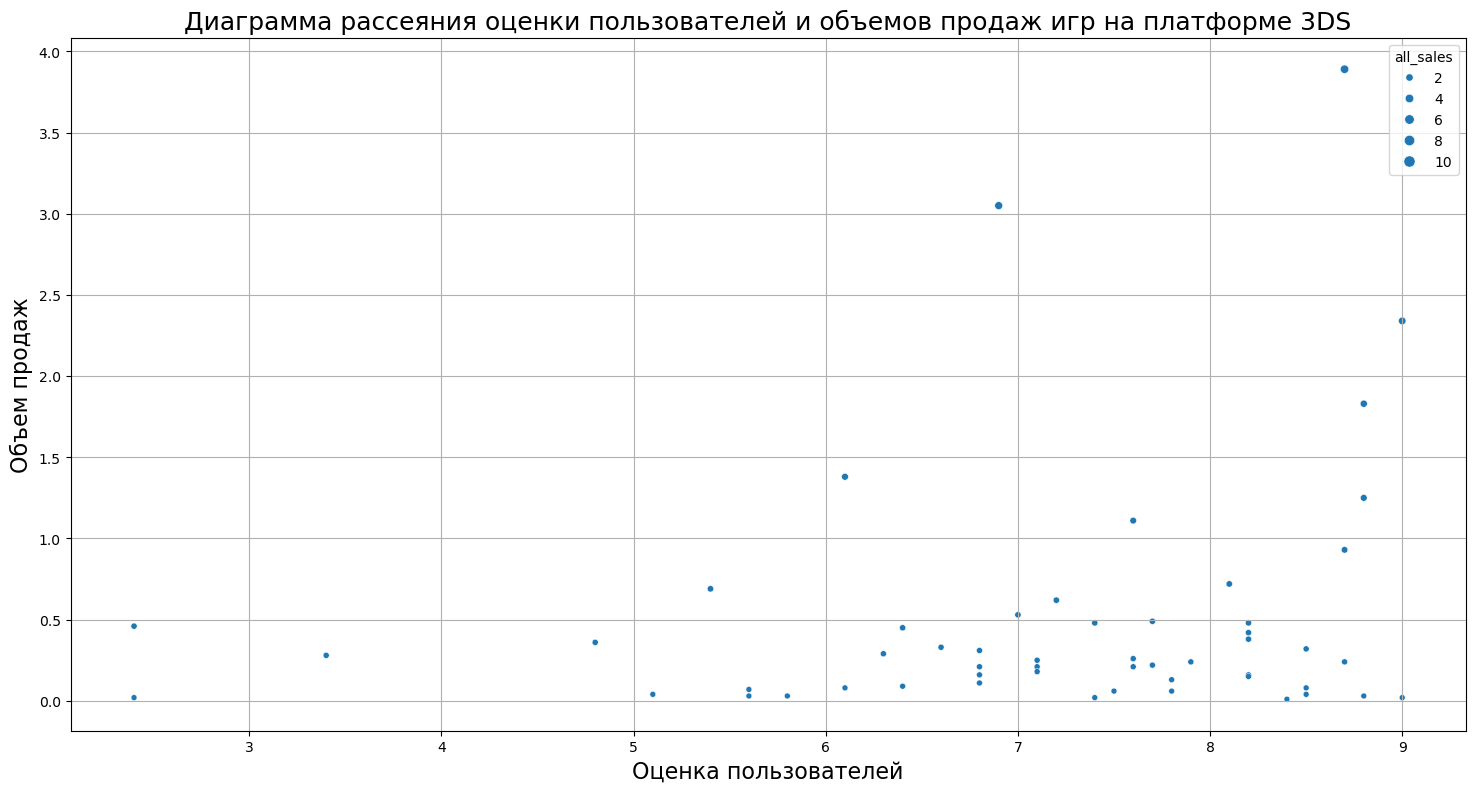

In [73]:
sales_3ds = slice_games.loc[slice_games['platform'] == '3DS']
plt.figure(figsize=(18, 9))
sns.scatterplot(data=sales_3ds, x='user_score', y='all_sales', size='all_sales', palette='deep')
plt.title('Диаграмма рассеяния оценки пользователей и объемов продаж игр на платформе 3DS', fontsize=18)
plt.xlabel('Оценка пользователей', fontsize=16)
plt.ylabel('Объем продаж', fontsize=16)
plt.grid()
plt.show(close=None, block=None)

C:\Users\user\AppData\Local\Temp\ipykernel_8020\2372286135.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=sales_xone, x='user_score', y='all_sales', size='all_sales', palette='deep')


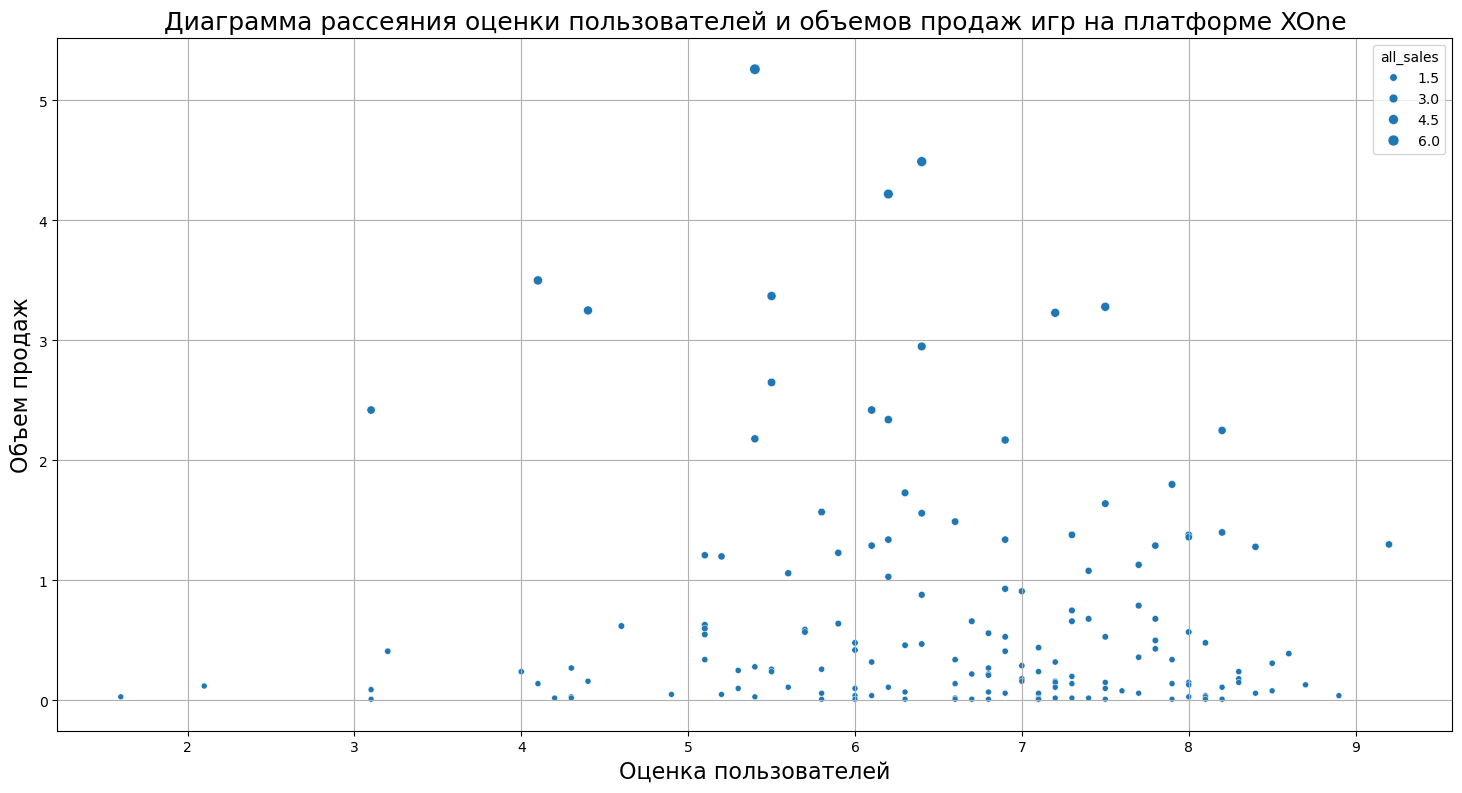

In [74]:
sales_xone = slice_games.loc[slice_games['platform'] == 'XOne']
plt.figure(figsize=(18, 9))
sns.scatterplot(data=sales_xone, x='user_score', y='all_sales', size='all_sales', palette='deep')
plt.title('Диаграмма рассеяния оценки пользователей и объемов продаж игр на платформе XOne', fontsize=18)
plt.xlabel('Оценка пользователей', fontsize=16)
plt.ylabel('Объем продаж', fontsize=16)
plt.grid()
plt.show(close=None, block=None)

C:\Users\user\AppData\Local\Temp\ipykernel_8020\2778177115.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=sales_pc, x='user_score', y='all_sales', size='all_sales', palette='deep')


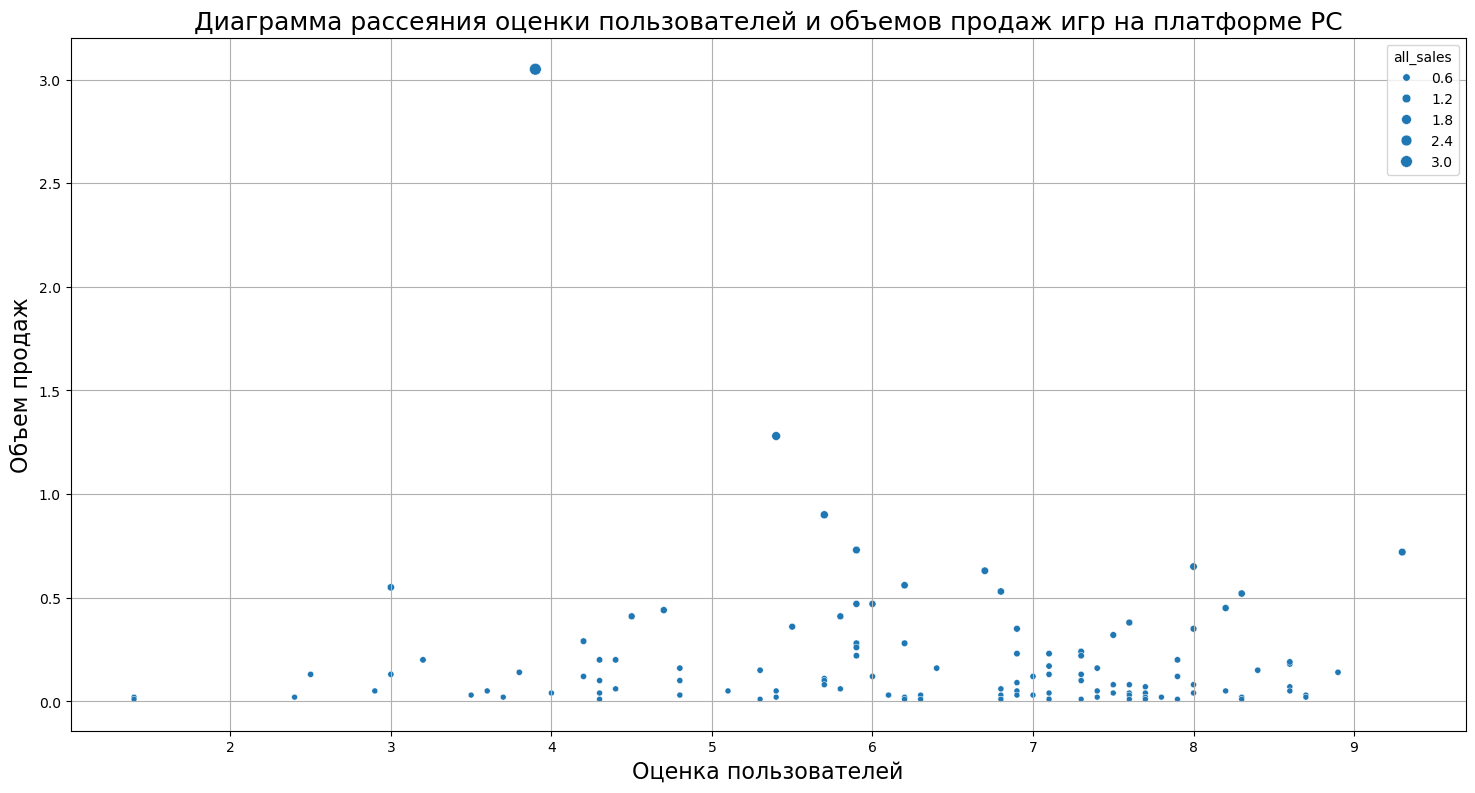

In [75]:
sales_pc = slice_games.loc[slice_games['platform'] == 'PC']
plt.figure(figsize=(18, 9))
sns.scatterplot(data=sales_pc, x='user_score', y='all_sales', size='all_sales', palette='deep')
plt.title('Диаграмма рассеяния оценки пользователей и объемов продаж игр на платформе PC', fontsize=18)
plt.xlabel('Оценка пользователей', fontsize=16)
plt.ylabel('Объем продаж', fontsize=16)
plt.grid()
plt.show(close=None, block=None)

**Корреляция между объмами продаж и оценками пользователей по каждой актуальной платформе**

In [76]:
print(f'Коэффициент корреляции для платформы PS4:', sales_ps4['all_sales'].corr(sales_ps4['user_score']))
print()
print(f'Коэффициент корреляции для платформы PSV:', sales_ps5['all_sales'].corr(sales_ps5['user_score']))
print()
print(f'Коэффициент корреляции для платформы 3DS:', sales_3ds['all_sales'].corr(sales_3ds['user_score']))
print()
print(f'Коэффициент корреляции для платформы XOne:', sales_xone['all_sales'].corr(sales_xone['user_score']))
print()
print(f'Коэффициент корреляции для платформы PC:', sales_pc['all_sales'].corr(sales_pc['user_score']))

Коэффициент корреляции для платформы PS4: -0.08145991451963486

Коэффициент корреляции для платформы PSV: -0.1810931408849681

Коэффициент корреляции для платформы 3DS: 0.21552148794646017

Коэффициент корреляции для платформы XOne: -0.09928343165849422

Коэффициент корреляции для платформы PC: -0.09177645064573864


**Вывод:**

1. Корреляции между уровнем продаж и оценкой пользователей не наблюдается (значение -0.057). На диаграмме рассеяния отсутствует рост оценок при увеличении объемов продаж. Вцелом прямой и сильной связи между оценками пользователей и уровнем продаж не наблюдается.


2. Также на некоторых диаграммах рассеяния по различным платформам видно, что некоторые игры имеют огромные продажи, но при этом находятся в зоне низких рейтингов пользователей. На эту ситуацию также может оказывать влияние неполное наличие оценок пользователей в наборе данных (т. е. наличие пропусков).

**Корреляция между объмами продаж и оценками критиков**

In [77]:
slice_games['all_sales'].corr(slice_games['critic_score'])

0.3119434265450105

**Диаграмма рассеяния общего объема продаж и оценок критиков**

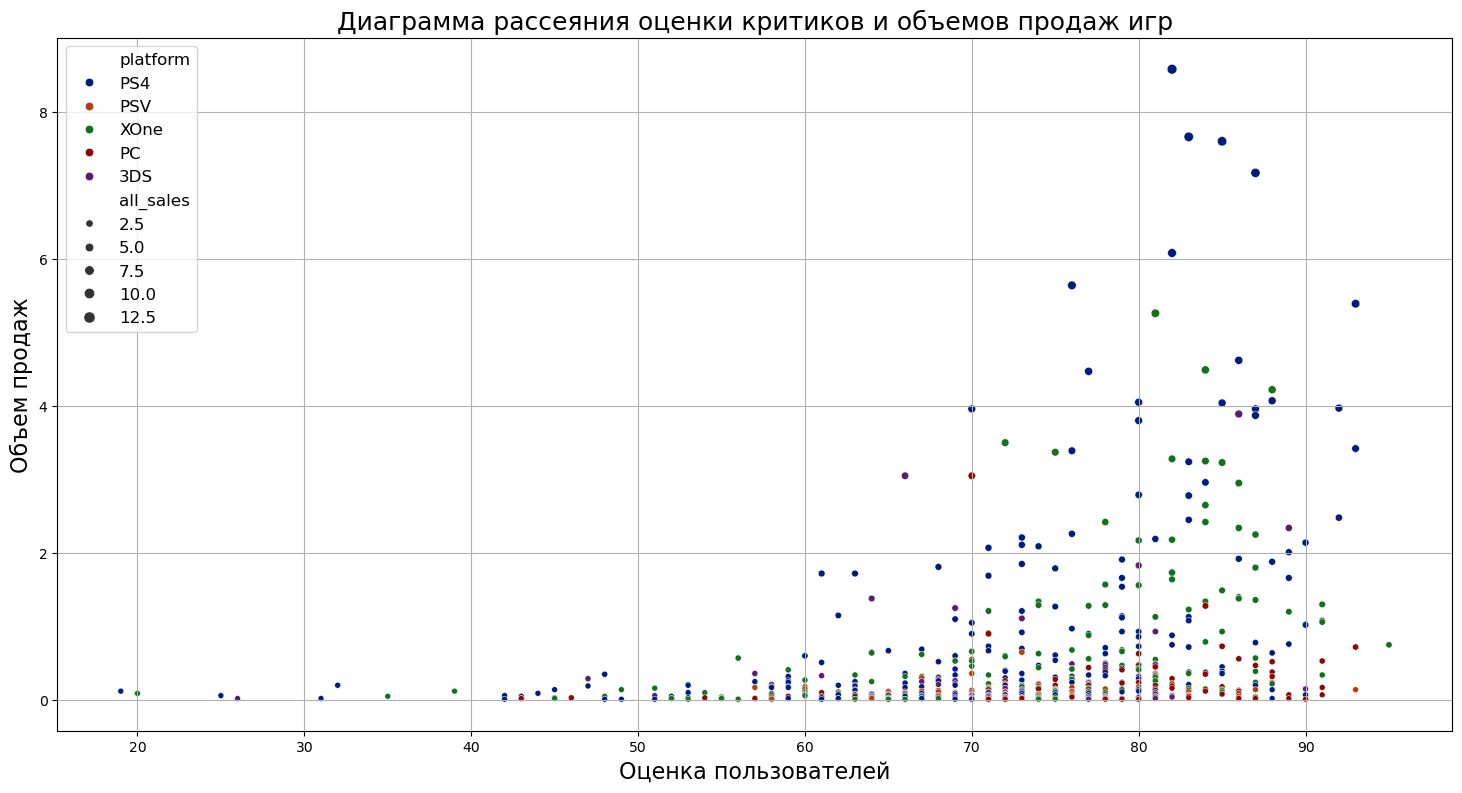

In [78]:
plt.figure(figsize=(18, 9))
sns.scatterplot(data=slice_games, x='critic_score', y='all_sales', palette='dark', size='all_sales', hue ='platform',
                hue_order=['PS4', 'PSV', 'XOne', 'PC', '3DS'])
plt.title('Диаграмма рассеяния оценки критиков и объемов продаж игр', fontsize=18)
plt.xlabel('Оценка пользователей', fontsize=16)
plt.ylabel('Объем продаж', fontsize=16)
plt.legend(loc='upper left', fontsize=12)
plt.grid()
plt.show(close=None, block=None)

**Диаграммы рассеяния общего объема продаж и оценок критиков по каждой актуальной платформе**

C:\Users\user\AppData\Local\Temp\ipykernel_8020\3932884782.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=sales_ps4, x='critic_score', y='all_sales', size='all_sales', palette='deep')


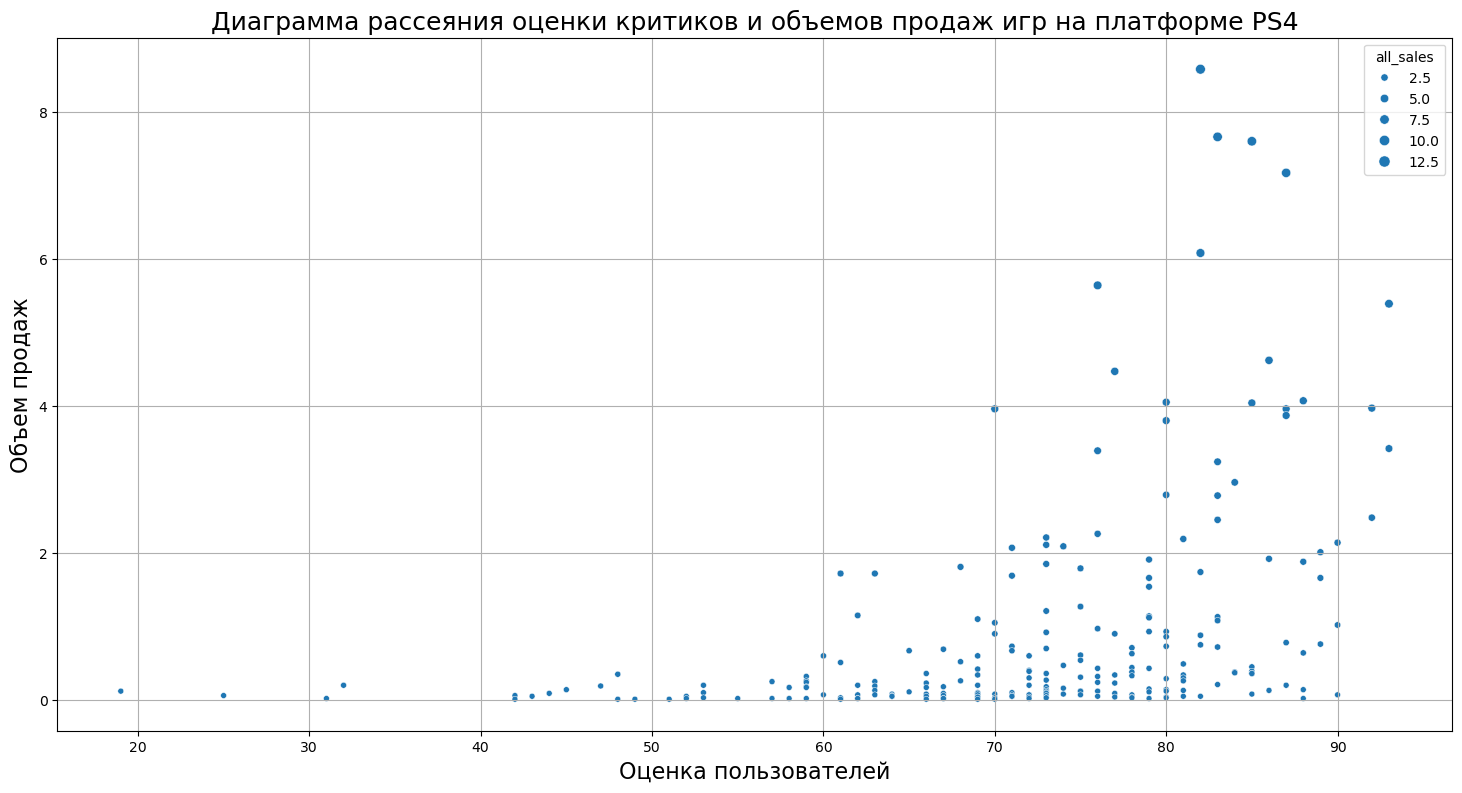

In [79]:
sales_ps4 = slice_games.loc[slice_games['platform'] == 'PS4']
plt.figure(figsize=(18, 9))
sns.scatterplot(data=sales_ps4, x='critic_score', y='all_sales', size='all_sales', palette='deep')
plt.title('Диаграмма рассеяния оценки критиков и объемов продаж игр на платформе PS4', fontsize=18)
plt.xlabel('Оценка пользователей', fontsize=16)
plt.ylabel('Объем продаж', fontsize=16)
plt.grid()
plt.show(close=None, block=None)

C:\Users\user\AppData\Local\Temp\ipykernel_8020\1259792391.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=sales_ps5, x='critic_score', y='all_sales', size='all_sales', palette='deep')


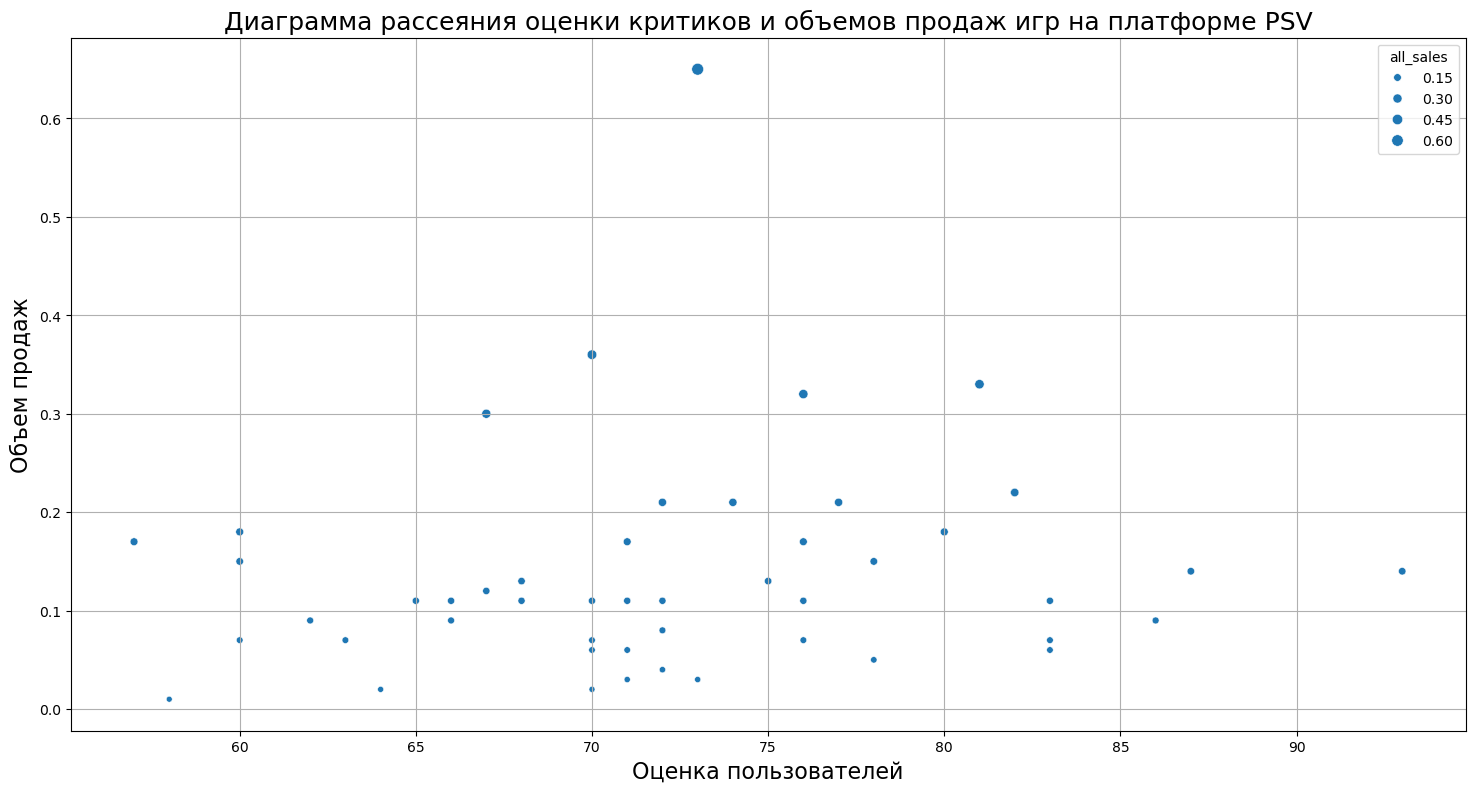

In [80]:
sales_ps5 = slice_games.loc[slice_games['platform'] == 'PSV']
plt.figure(figsize=(18, 9))
sns.scatterplot(data=sales_ps5, x='critic_score', y='all_sales', size='all_sales', palette='deep')
plt.title('Диаграмма рассеяния оценки критиков и объемов продаж игр на платформе PSV', fontsize=18)
plt.xlabel('Оценка пользователей', fontsize=16)
plt.ylabel('Объем продаж', fontsize=16)
plt.grid()
plt.show(close=None, block=None)

C:\Users\user\AppData\Local\Temp\ipykernel_8020\3016425865.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=sales_3ds, x='critic_score', y='all_sales', size='all_sales', palette='deep')


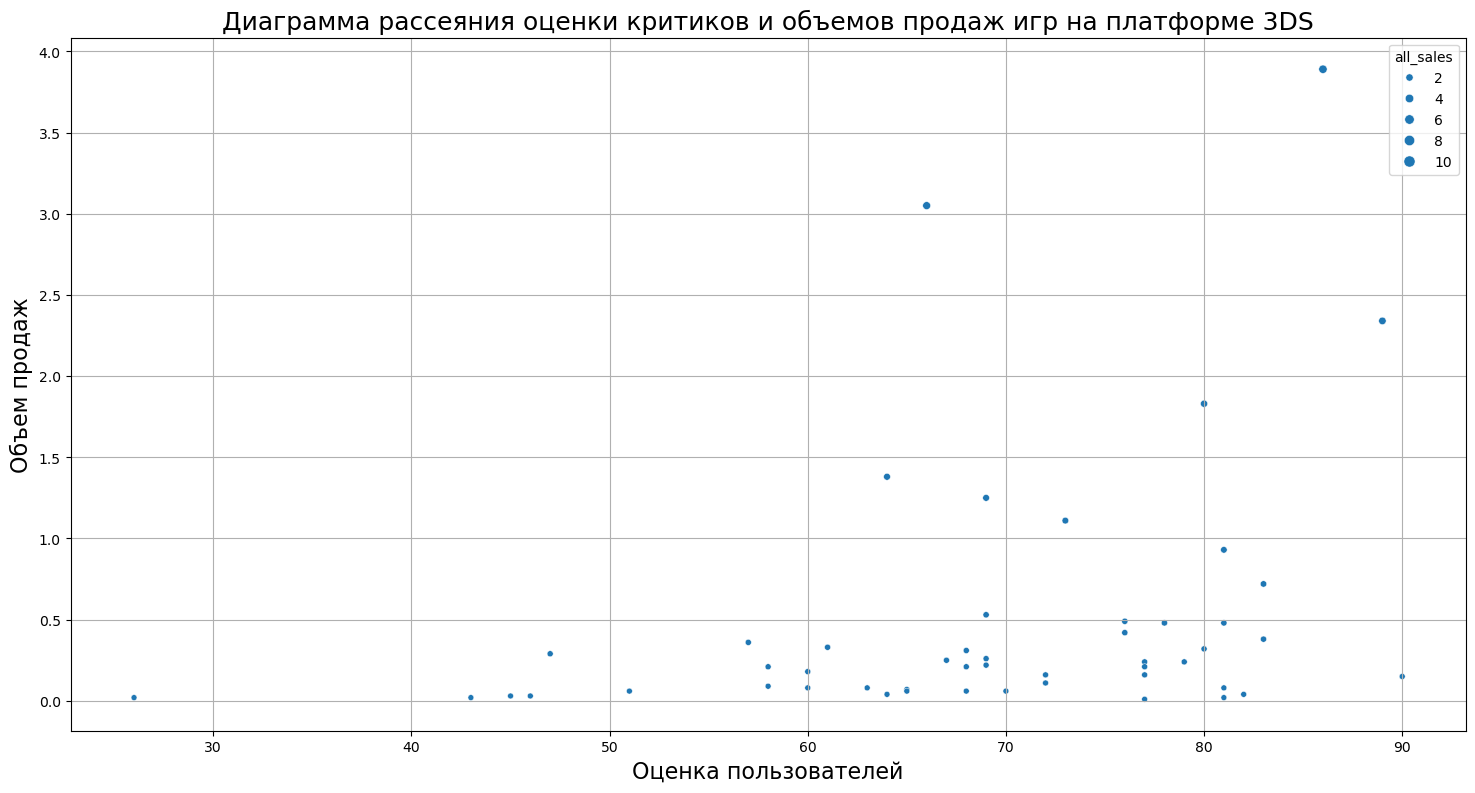

In [81]:
sales_3ds = slice_games.loc[slice_games['platform'] == '3DS']
plt.figure(figsize=(18, 9))
sns.scatterplot(data=sales_3ds, x='critic_score', y='all_sales', size='all_sales', palette='deep')
plt.title('Диаграмма рассеяния оценки критиков и объемов продаж игр на платформе 3DS', fontsize=18)
plt.xlabel('Оценка пользователей', fontsize=16)
plt.ylabel('Объем продаж', fontsize=16)
plt.grid()
plt.show(close=None, block=None)

C:\Users\user\AppData\Local\Temp\ipykernel_8020\2425978844.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=sales_xone, x='critic_score', y='all_sales', size='all_sales', palette='deep')


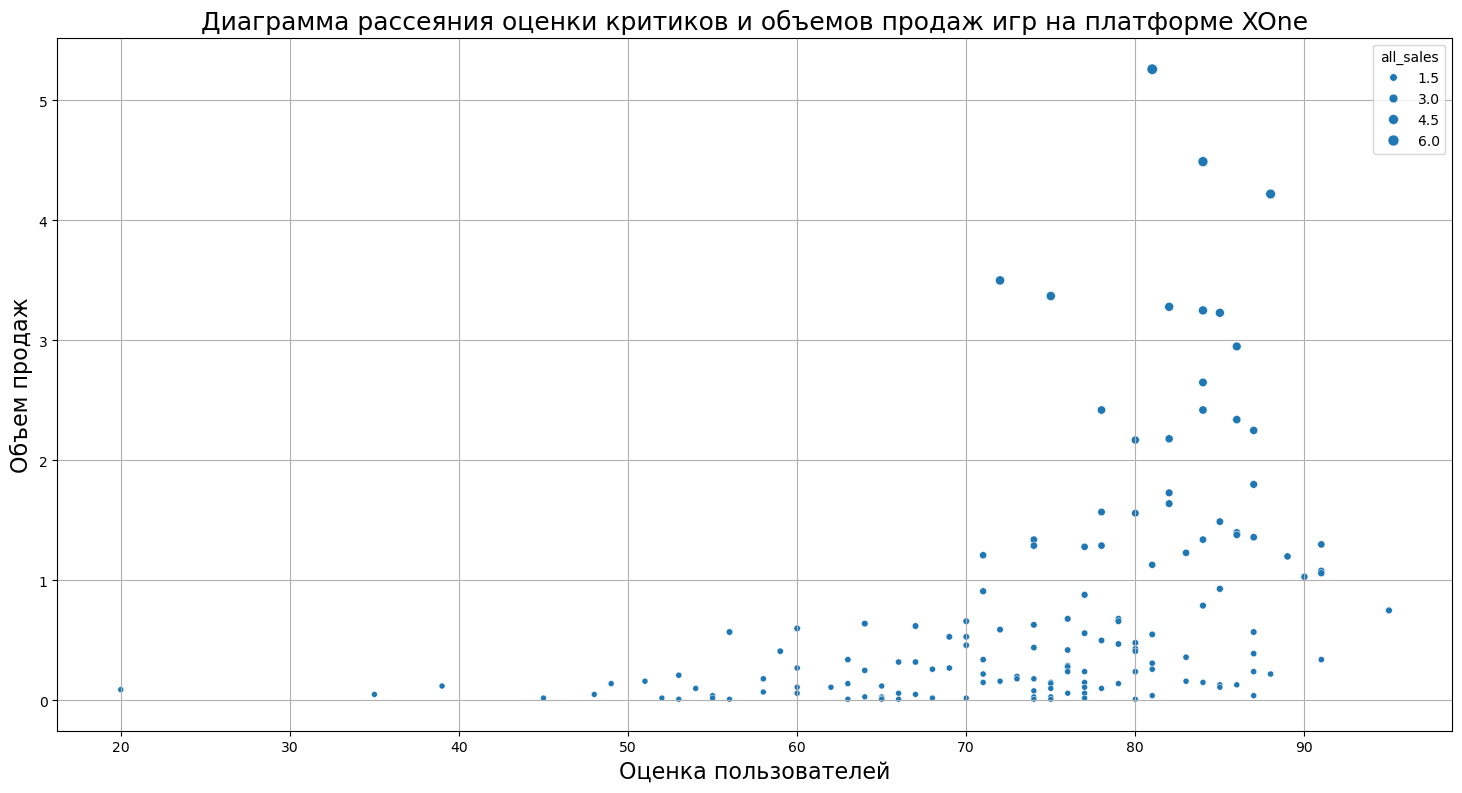

In [82]:
sales_xone = slice_games.loc[slice_games['platform'] == 'XOne']
plt.figure(figsize=(18, 9))
sns.scatterplot(data=sales_xone, x='critic_score', y='all_sales', size='all_sales', palette='deep')
plt.title('Диаграмма рассеяния оценки критиков и объемов продаж игр на платформе XOne', fontsize=18)
plt.xlabel('Оценка пользователей', fontsize=16)
plt.ylabel('Объем продаж', fontsize=16)
plt.grid()
plt.show(close=None, block=None)

C:\Users\user\AppData\Local\Temp\ipykernel_8020\2974632559.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=sales_pc, x='critic_score', y='all_sales', size='all_sales', palette='deep')


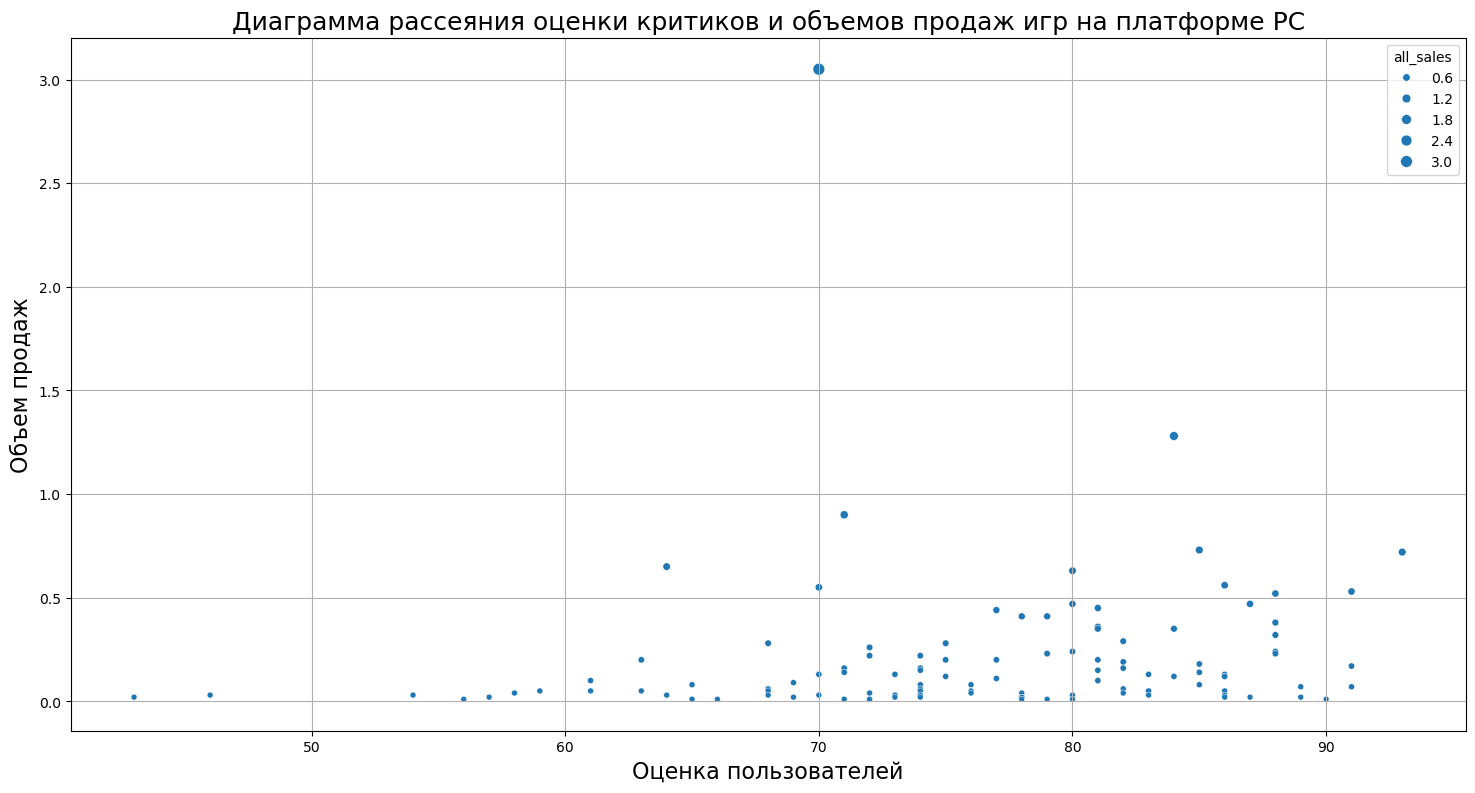

In [83]:
sales_pc = slice_games.loc[slice_games['platform'] == 'PC']
plt.figure(figsize=(18, 9))
sns.scatterplot(data=sales_pc, x='critic_score', y='all_sales', size='all_sales', palette='deep')
plt.title('Диаграмма рассеяния оценки критиков и объемов продаж игр на платформе PC', fontsize=18)
plt.xlabel('Оценка пользователей', fontsize=16)
plt.ylabel('Объем продаж', fontsize=16)
plt.grid()
plt.show(close=None, block=None)

**Корреляция между объмами продаж и оценками критиков по каждой актуальной платформе**

In [84]:
print(f'Коэффициент корреляции для платформы PS4:', sales_ps4['all_sales'].corr(sales_ps4['critic_score']))
print()
print(f'Коэффициент корреляции для платформы PSV:', sales_ps5['all_sales'].corr(sales_ps5['critic_score']))
print()
print(f'Коэффициент корреляции для платформы 3DS:', sales_3ds['all_sales'].corr(sales_3ds['critic_score']))
print()
print(f'Коэффициент корреляции для платформы XOne:', sales_xone['all_sales'].corr(sales_xone['critic_score']))
print()
print(f'Коэффициент корреляции для платформы PC:', sales_pc['all_sales'].corr(sales_pc['critic_score']))
print()

Коэффициент корреляции для платформы PS4: 0.3932854313868081

Коэффициент корреляции для платформы PSV: 0.1411000801352383

Коэффициент корреляции для платформы 3DS: 0.31661810736245916

Коэффициент корреляции для платформы XOne: 0.4083644983337216

Коэффициент корреляции для платформы PC: 0.12850281738178382



**Вывод:**

1. Корреляция между уровнем продаж и оценкой критиков слабая (значение - 0.31). На диаграмме рассеяния заметен небольшой рос объемов продаж при росте оценок критиков, но не по всем платформам. Наибольшие коэффициенты корреляции у платформ 'PS4' - 0.39 и 'XOne' - 0.40. Вцелом зависимость между признаками слабая.


2. На диаграммах рассеяния по различным платформам видно, что игры, имеют большие продажи преимущественно находятся в зоне высоких рейтингов критиков. На эту ситуацию также может оказывать влияние неполное наличие оценок критиков в наборе данных (т. е. наличие пропусков).

###### Распределение игр по жанрам

**Доля каждого жанра в общем количестве**

In [85]:
actual_genre = slice_games['genre'].value_counts().sort_values(ascending=False).transform(lambda x: 100 * x / x.sum())
actual_genre.round(2).to_frame().style.format('{:.1f}').background_gradient(cmap='Blues')

,count
genre,
Action,36.0
Role-Playing,13.8
Adventure,11.5
Sports,8.6
Shooter,7.8
Misc,5.9
Racing,4.4
Simulation,3.4
Strategy,2.9


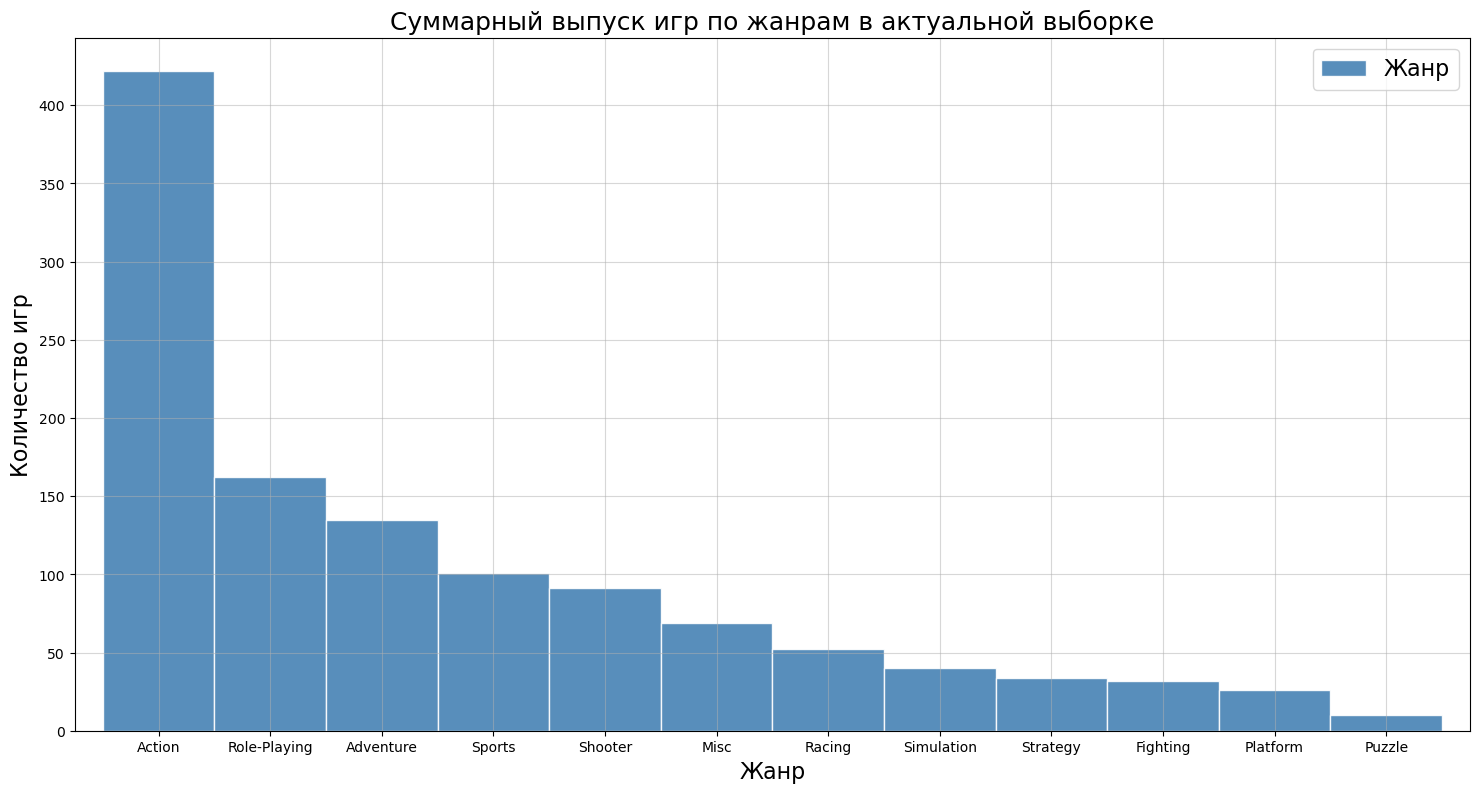

In [86]:
slice_games['genre'].value_counts().sort_values(ascending=False).plot(
    kind='bar', figsize=(18, 9), color='steelblue', ec='white', alpha=0.9, width=1)
plt.title('Суммарный выпуск игр по жанрам в актуальной выборке', fontsize=18)
plt.xlabel('Жанр', fontsize=16)
plt.ylabel('Количество игр', fontsize=16)
plt.legend(['Жанр'], loc='upper right', fontsize=16)
plt.xticks(rotation=0)
plt.grid(alpha=0.5)
plt.show(close=None, block=None)

**Доля каждого жанра в общем объеме продаж**

In [87]:
actual_genre_sales = slice_games.groupby('genre')['all_sales'].sum().\
sort_values(ascending=False).transform(lambda x: 100 * x / x.sum())
actual_genre_sales.round(2).to_frame().style.format('{:.1f}').background_gradient(cmap='Blues')

C:\Users\user\AppData\Local\Temp\ipykernel_8020\2824481759.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  actual_genre_sales = slice_games.groupby('genre')['all_sales'].sum().\


,all_sales
genre,
Shooter,27.2
Action,24.7
Role-Playing,16.0
Sports,15.1
Fighting,3.6
Racing,3.5
Adventure,2.4
Simulation,2.4
Misc,2.3


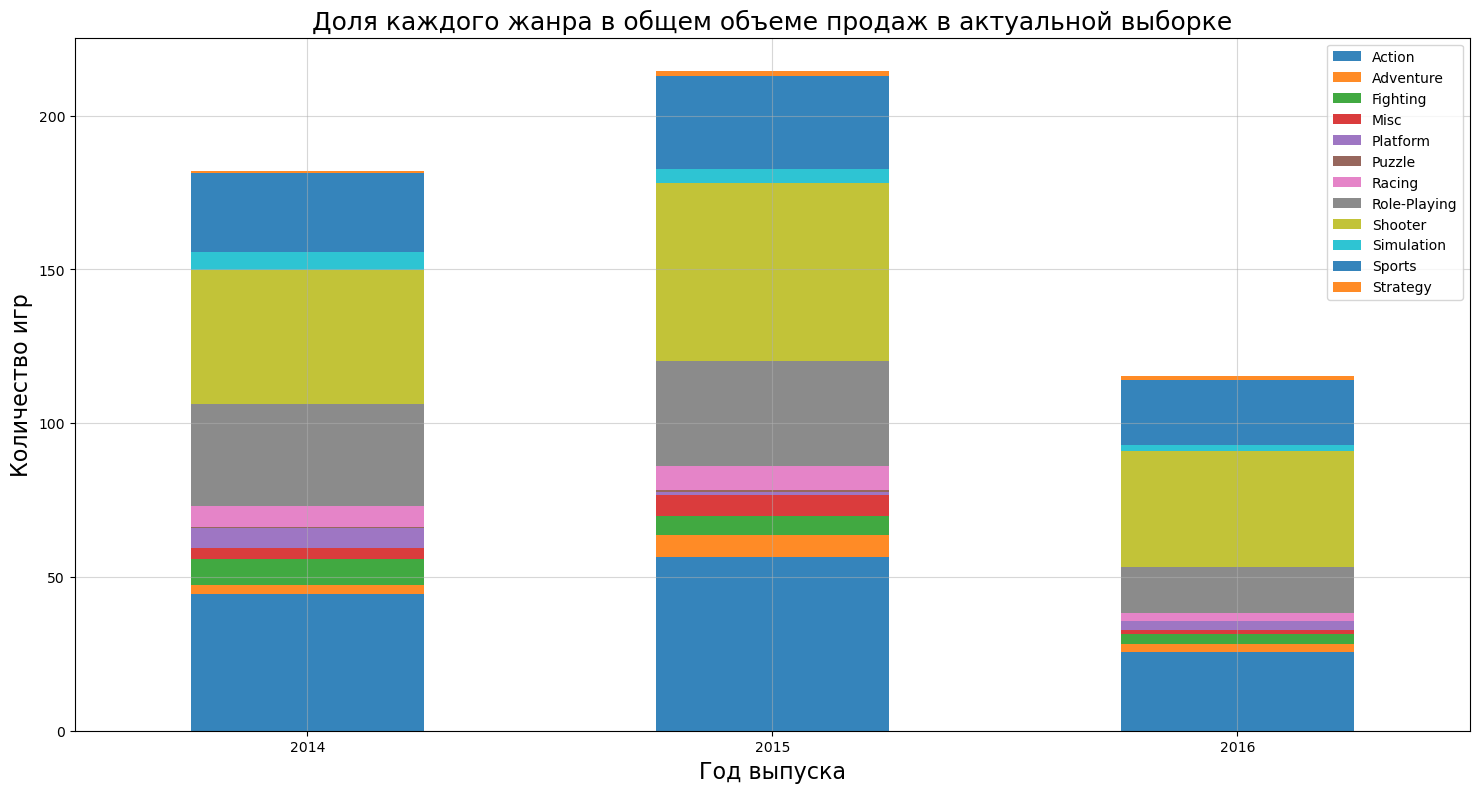

In [88]:
slice_games.pivot_table(index='year_of_release', 
                  columns = 'genre', 
                  values = 'all_sales', 
                  aggfunc = 'sum', observed=False).sort_index(ascending=True).plot(
    kind='bar', stacked=True, figsize=(18, 9), alpha=0.9, width=0.5) 
plt.title('Доля каждого жанра в общем объеме продаж в актуальной выборке', fontsize=18)
plt.xlabel('Год выпуска', fontsize=16)
plt.ylabel('Количество игр', fontsize=16)
plt.xticks(rotation=0)
plt.legend(loc='upper right', fontsize=10)
plt.grid(alpha=0.5)
plt.show(close=None, block=None)

**Рассмотрение средних и медианных продаж игр по жанрам**

In [89]:
actual_genre_sales.describe()

count    12.000000
mean      8.333333
std       9.743307
min       0.185579
25%       2.198140
50%       2.953644
75%      15.281983
max      27.164931
Name: all_sales, dtype: float64

In [90]:
aggfuncs = ['mean', 'count']
mean_sales = slice_games.pivot_table(index='year_of_release', columns = 'genre', 
                                     values = 'all_sales', aggfunc = aggfuncs, observed = False)

mean_sales.round(2).T

year_of_release       2014    2015    2016
      genre                               
mean  Action          0.41    0.33    0.18
      Adventure       0.07    0.17    0.05
      Fighting        1.22    0.53    0.25
      Misc            0.16    0.26    0.06
      Platform        0.95    0.10    0.25
      Puzzle          0.06    0.14    0.01
      Racing          0.54    0.50    0.12
      Role-Playing    0.58    0.55    0.35
      Shooter         1.82    2.31    0.90
      Simulation      0.60    0.37    0.11
      Sports          0.85    0.82    0.62
      Strategy        0.14    0.12    0.09
count Action        107.00  172.00  143.00
      Adventure      45.00   41.00   49.00
      Fighting        7.00   12.00   13.00
      Misc           21.00   26.00   22.00
      Platform        7.00    8.00   11.00
      Puzzle          4.00    5.00    1.00
      Racing         13.00   16.00   23.00
      Role-Playing   57.00   62.00   43.00
      Shooter        24.00   25.00   42.00
      Simulation     10.00   12.00   18.00
      Sports         30.00   37.00   34.00
      Strategy        6.00   15.00   13.00

**Выводы:**

1. В пятерку лидеров жанров по количеству игр в выборке за актуальный период входят: Action, Role-Playing, Adventure, Sports и Shooter. 


2. Пятерка лидеров жанров по объемам продаж немного различается и включает: Shooter, Action, Role-Playing, Sports и Fighting. На эти пять жанров приходится 86.6 процента рынка. 


3. По результатам исследования выявлено, что большие объемы продаж не всегда зависят от большого количества игр какого-либо жанра на рынке. Например, в лидирующих жанрах Action и Shooter эта ситуация проявляется отчетливо. Количество игр жанра Action ежегодно в актуальном периоде представлено в количестве 107 в 2014, 172 в 2015 и 143 в 2016 году и средние продажи по этим годам составляют 0.41 млрд., 0.33 млрд. и 0.18 млрд. соответственно. Но, игр жанра Shooter на рынке представлено в разы меньше: 24 в 2014 году, 25 в 2015 году и 42 в 2016 году, а продажи наоборот значительно превосходят жанр Action и составляют 1.82 млрд в 2014 году, 2.31 млрд в 2015 году и 0.90 млрд в 2016 году. Вместе с тем, игр спортивного жанра на рынке больше жанра Shooter, но выручка меньше. А ролевых игр больше, чем спортивных, но выручка меньше.

##### Портрет пользователя каждого региона

###### Самые популярные платформы 

**Северная Америка (регион NA)**

Пять самых популярных платформ (регион NA)

In [91]:
popular_platform_na = slice_games.groupby('platform')['na_sales'].sum().sort_values(ascending=False).\
transform(lambda x: 100 * x / x.sum())
popular_platform_na.head(5).round(2).to_frame().style.format('{:.1f}').background_gradient(cmap='Blues')

C:\Users\user\AppData\Local\Temp\ipykernel_8020\2500641505.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  popular_platform_na = slice_games.groupby('platform')['na_sales'].sum().sort_values(ascending=False).\


,na_sales
platform,
PS4,45.3
XOne,38.6
3DS,11.6
PC,3.6
PSV,0.9


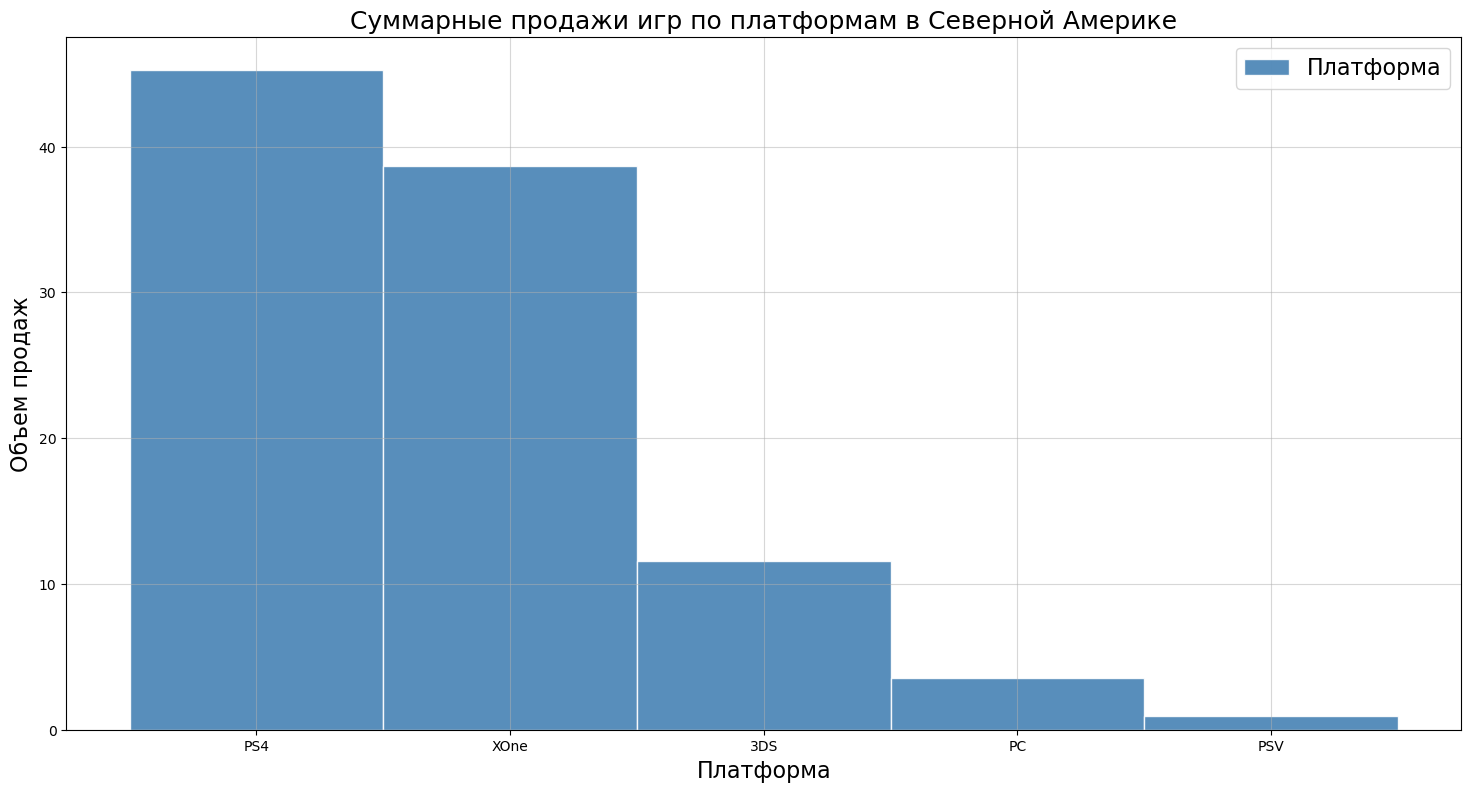

In [92]:
popular_platform_na.head(5).plot(kind='bar', figsize=(18, 9), color='steelblue', ec='white', alpha=0.9, width=1)
plt.title('Суммарные продажи игр по платформам в Северной Америке', fontsize=18)
plt.xlabel('Платформа', fontsize=16)
plt.ylabel('Объем продаж', fontsize=16)
plt.legend(['Платформа'], loc='upper right', fontsize=16)
plt.xticks(rotation=0)
plt.grid(alpha=0.5)
plt.show(close=None, block=None)

**Европа (регион EU)**

Пять самых популярных платформ в Европе

In [93]:
popular_platform_eu = slice_games.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).\
transform(lambda x: 100 * x / x.sum())
popular_platform_eu.head(5).round(2).to_frame().style.format('{:.1f}').background_gradient(cmap='Blues')

C:\Users\user\AppData\Local\Temp\ipykernel_8020\674623597.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  popular_platform_eu = slice_games.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).\


,eu_sales
platform,
PS4,59.7
XOne,21.7
PC,9.0
3DS,8.3
PSV,1.3


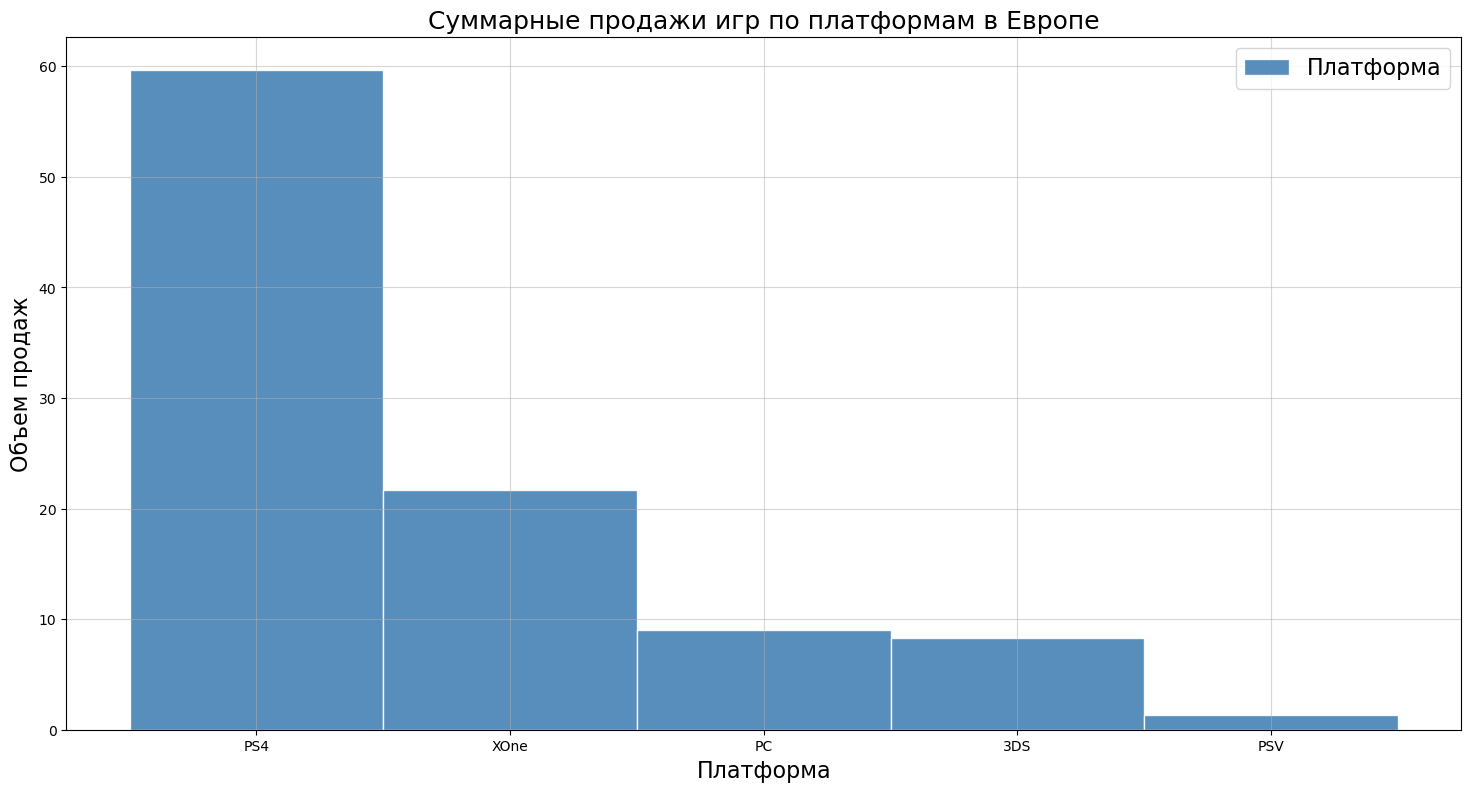

In [94]:
popular_platform_eu.head(5).plot(kind='bar', figsize=(18, 9), color='steelblue', ec='white', alpha=0.9, width=1)
plt.title('Суммарные продажи игр по платформам в Европе', fontsize=18)
plt.xlabel('Платформа', fontsize=16)
plt.ylabel('Объем продаж', fontsize=16)
plt.legend(['Платформа'], loc='upper right', fontsize=16)
plt.xticks(rotation=0)
plt.grid(alpha=0.5)
plt.show(close=None, block=None)

**Япония (регион JP)**

Пять самых попялярных платформ в Японии

In [95]:
popular_platform_jp = slice_games.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).\
transform(lambda x: 100 * x / x.sum())
popular_platform_jp.head(5).round(2).to_frame().style.format('{:.1f}').background_gradient(cmap='Blues')

C:\Users\user\AppData\Local\Temp\ipykernel_8020\2263197906.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  popular_platform_jp = slice_games.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).\


,jp_sales
platform,
3DS,60.9
PS4,19.8
PSV,18.9
XOne,0.5
PS2,0.0


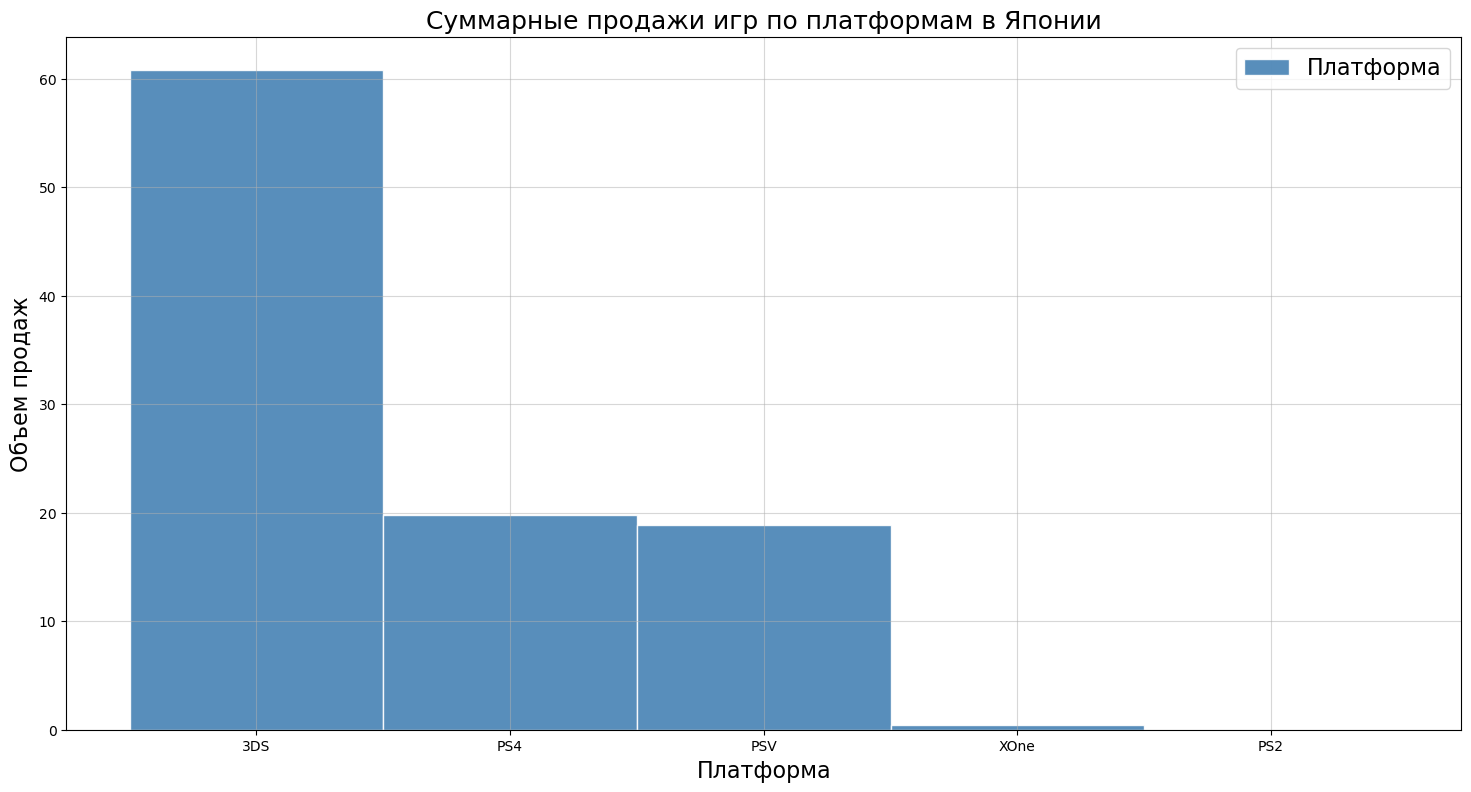

In [96]:
popular_platform_jp.head(5).plot(kind='bar', figsize=(18, 9), color='steelblue', ec='white', alpha=0.9, width=1)
plt.title('Суммарные продажи игр по платформам в Японии', fontsize=18)
plt.xlabel('Платформа', fontsize=16)
plt.ylabel('Объем продаж', fontsize=16)
plt.legend(['Платформа'], loc='upper right', fontsize=16)
plt.xticks(rotation=0)
plt.grid(alpha=0.5)
plt.show(close=None, block=None)

**Вывод:**

1. В Северной Америке и Европе среди лидирующих платформ PS4 и XOne они занимают 83.9 и 81.4 процента рынка соответственно. В Северной америке далее по популярности идут 3DS, PC и PSV, а в Европе - PC, 3DS и PSV.


2. Японский регион отличается от Северной Америки и Европы. На первом месте платформа 3DS, которая занимает подавляющие 60.9. Далее платформы идут в следующем порядке - PS4, PSV и XOne. 

###### Самые популярные жанры

**Северная Америка (регион NA)**

Пять самых популярных жанров в Северной Америке

In [97]:
popular_genres_na = slice_games.groupby('genre')['na_sales'].sum().\
sort_values(ascending=False).transform(lambda x: 100 * x / x.sum())
popular_genres_na.head(5).round(2).to_frame().style.format('{:.1f}').background_gradient(cmap='Blues')

C:\Users\user\AppData\Local\Temp\ipykernel_8020\2044039319.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  popular_genres_na = slice_games.groupby('genre')['na_sales'].sum().\


,na_sales
genre,
Shooter,33.1
Action,22.5
Sports,16.4
Role-Playing,13.8
Fighting,4.1


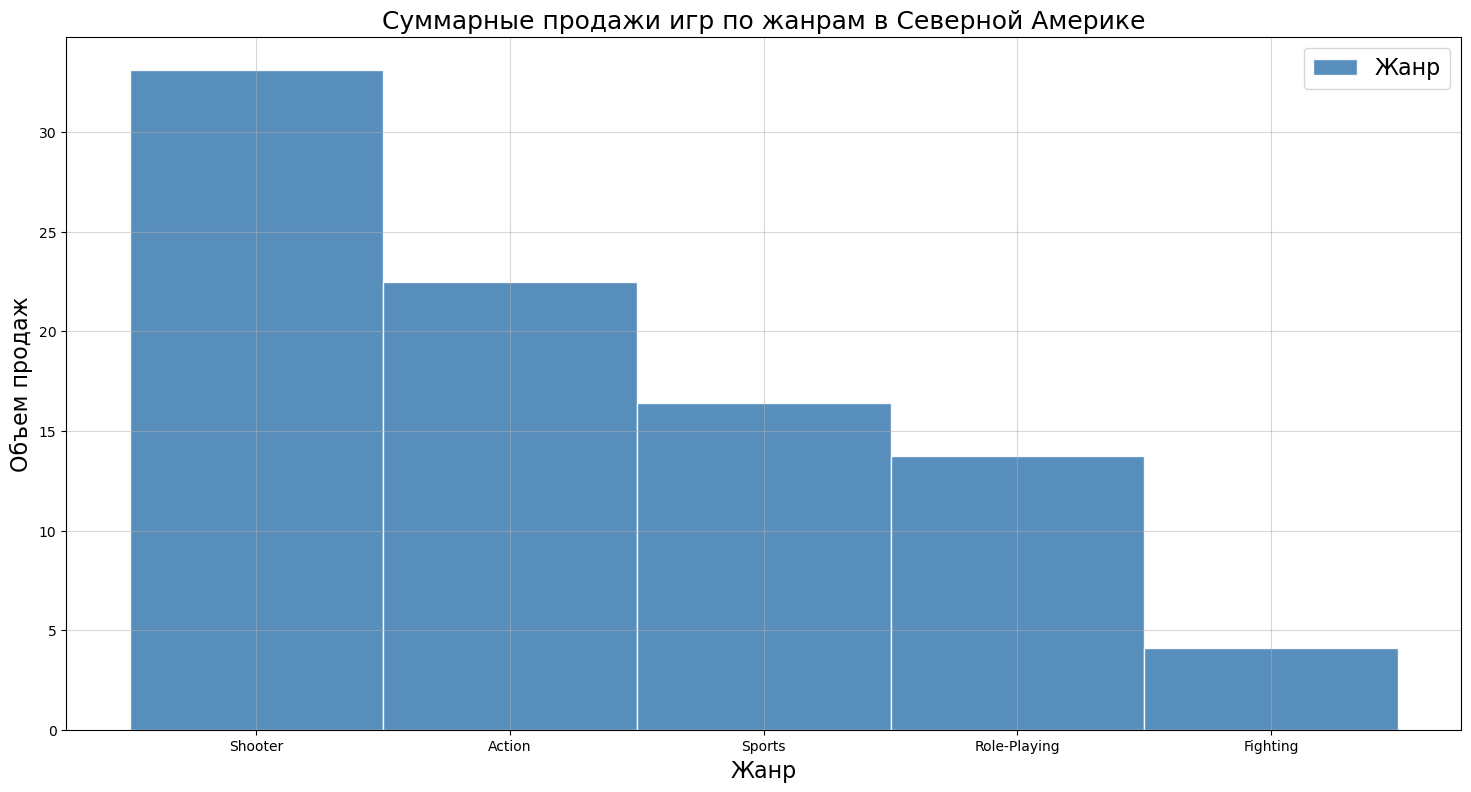

In [98]:
popular_genres_na.head(5).plot(kind='bar', figsize=(18, 9), color='steelblue', ec='white', alpha=0.9, width=1)
plt.title('Суммарные продажи игр по жанрам в Северной Америке', fontsize=18)
plt.xlabel('Жанр', fontsize=16)
plt.ylabel('Объем продаж', fontsize=16)
plt.legend(['Жанр'], loc='upper right', fontsize=16)
plt.xticks(rotation=0)
plt.grid(alpha=0.5)
plt.show(close=None, block=None)

**Европа (регион EU)**

Пять самых популярных жанров в Европе

In [99]:
popular_genres_eu = slice_games.groupby('genre')['eu_sales'].sum().\
sort_values(ascending=False).transform(lambda x: 100 * x / x.sum())
popular_genres_eu.head(5).round(2).to_frame().style.format('{:.1f}').background_gradient(cmap='Blues')

C:\Users\user\AppData\Local\Temp\ipykernel_8020\907059079.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  popular_genres_eu = slice_games.groupby('genre')['eu_sales'].sum().\


,eu_sales
genre,
Shooter,28.3
Action,23.8
Sports,17.2
Role-Playing,11.9
Racing,5.6


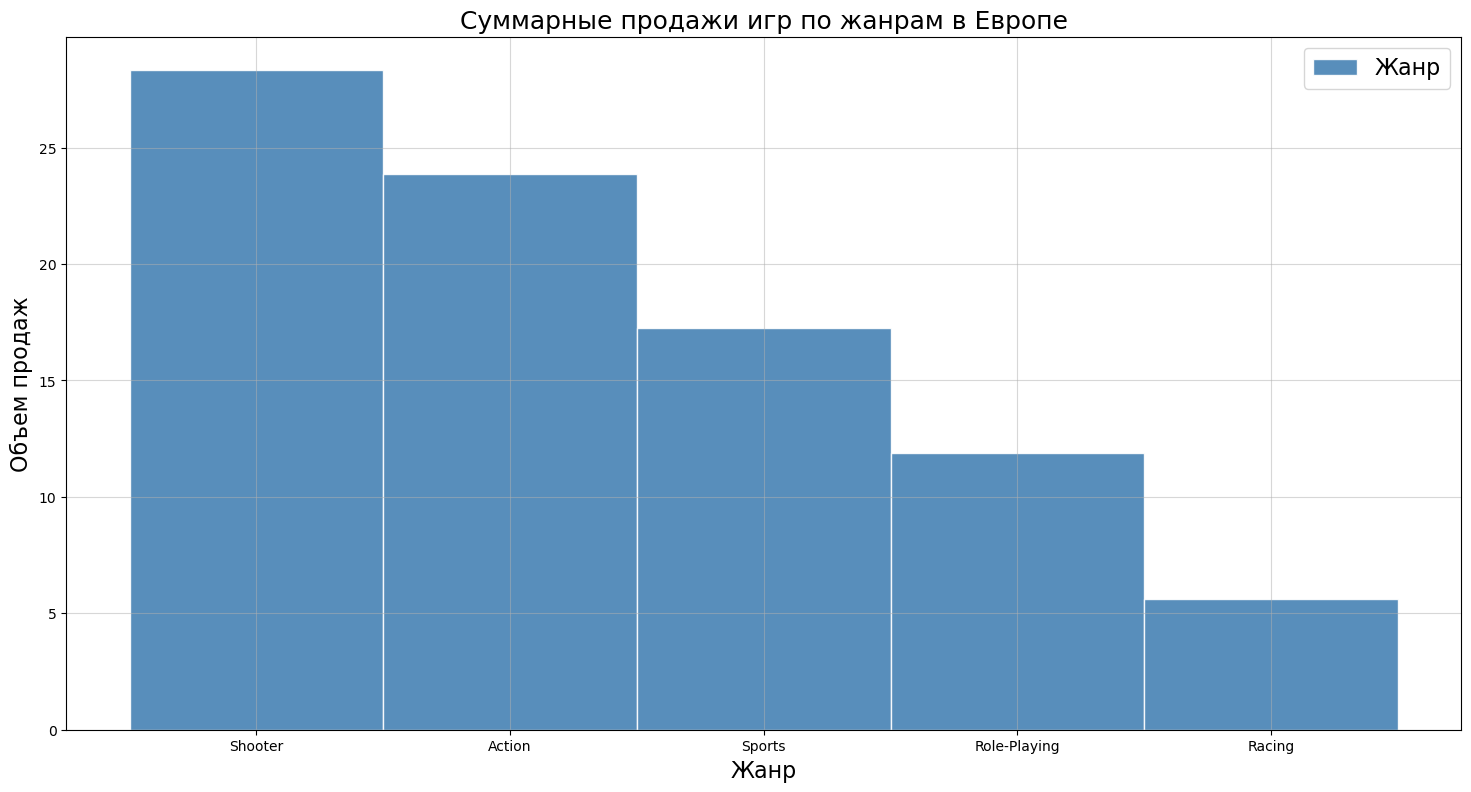

In [100]:
popular_genres_eu.head(5).plot(kind='bar', figsize=(18, 9), color='steelblue', ec='white', alpha=0.9, width=1)
plt.title('Суммарные продажи игр по жанрам в Европе', fontsize=18)
plt.xlabel('Жанр', fontsize=16)
plt.ylabel('Объем продаж', fontsize=16)
plt.legend(['Жанр'], loc='upper right', fontsize=16)
plt.xticks(rotation=0)
plt.grid(alpha=0.5)
plt.show(close=None, block=None)

**Япония (регион JP)**

Пять самых популярных жанров в Японии

In [101]:
popular_genres_jp = slice_games.groupby('genre')['jp_sales'].sum().\
sort_values(ascending=False).transform(lambda x: 100 * x / x.sum())
popular_genres_jp.head(5).round(2).to_frame().style.format('{:.1f}').background_gradient(cmap='Blues')

C:\Users\user\AppData\Local\Temp\ipykernel_8020\3444349432.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  popular_genres_jp = slice_games.groupby('genre')['jp_sales'].sum().\


,jp_sales
genre,
Role-Playing,37.2
Action,33.6
Fighting,5.7
Misc,4.8
Adventure,4.3


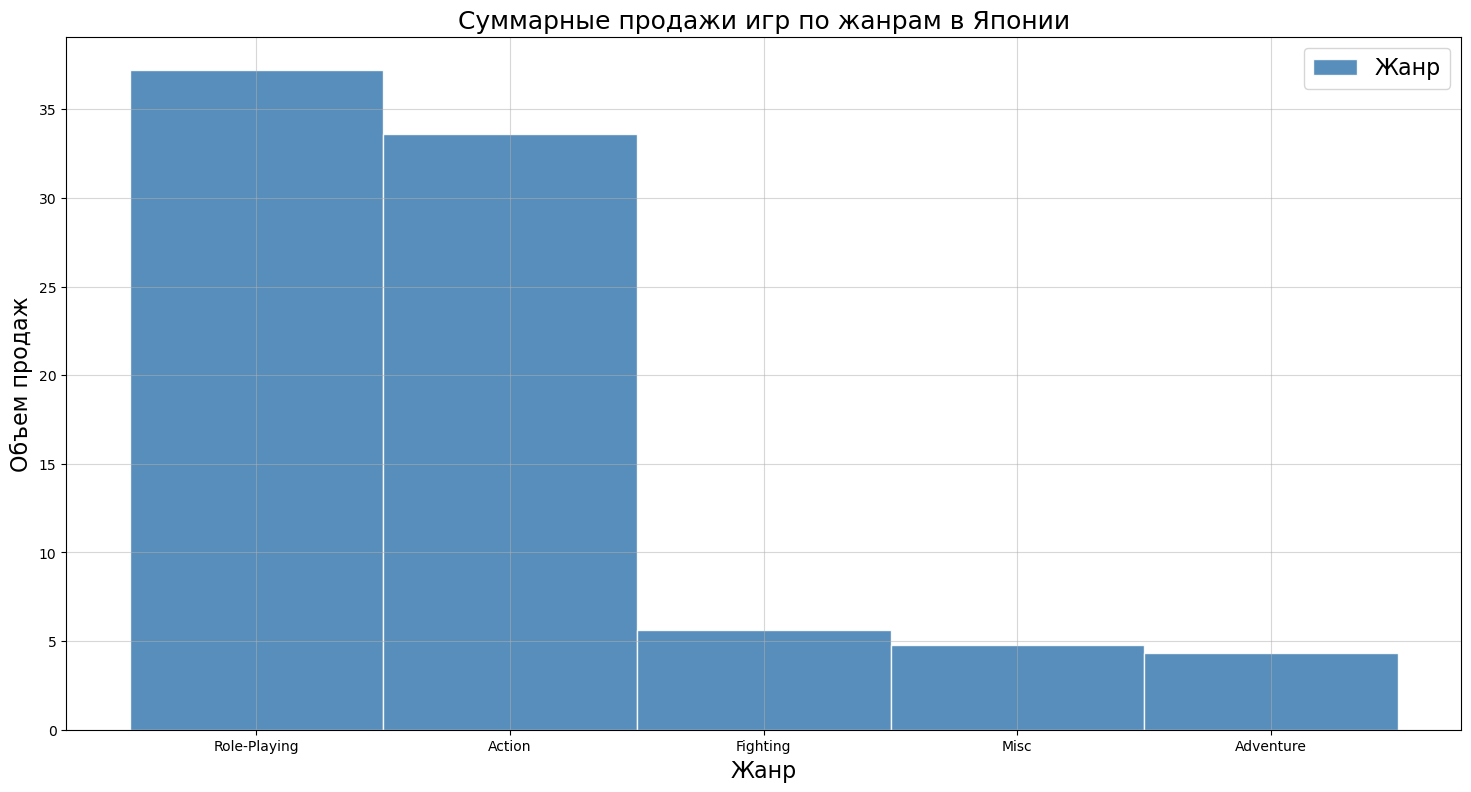

In [102]:
popular_genres_jp.head(5).plot(kind='bar', figsize=(18, 9), color='steelblue', ec='white', alpha=0.9, width=1)
plt.title('Суммарные продажи игр по жанрам в Японии', fontsize=18)
plt.xlabel('Жанр', fontsize=16)
plt.ylabel('Объем продаж', fontsize=16)
plt.legend(['Жанр'], loc='upper right', fontsize=16)
plt.xticks(rotation=0)
plt.grid(alpha=0.5)
plt.show(close=None, block=None)

**Вывод:**

1. Популярность жанров в Северной Америке и Европе очень схожи. На первом месте жанр Shooter, он лидирует и составляет треть от общего количества. Далее одинаково идут Action, Sports и Role-Playing. Единственное  различиев Северной Америке пятерку лидеров замыкает жанр Fighting, а в Европе гонки (Racing) с очень минорными долями в 4.1 и 5.6 процента соответственно.


2. Японский регион по жанровым предпочтениям отличается от Северной Америки и Европы. На первом и втором местах жанры Role-Playing и Action с подавляющим большинством более чем в 70 процентов рынка, далее идут с минорными долями Fighting, Misc, Adventure. В Японии в отличие от Северной Америки очень популярен жанр Role-Playing и присутствет жанр Misc, который в Северной Америке и Европе вообще не входит в пятерку популярнных жанров.

###### Влияние рейтинга ESRB на продажи

Доля продаж игр по рейтингам в Северной Америке

In [103]:
rating_na = slice_games.groupby('rating')['na_sales'].sum().\
sort_values(ascending=False).transform(lambda x: 100 * x / x.sum())
rating_na.round(2).to_frame().style.format('{:.1f}').background_gradient(cmap='Blues')

C:\Users\user\AppData\Local\Temp\ipykernel_8020\3569877441.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_na = slice_games.groupby('rating')['na_sales'].sum().\


,na_sales
rating,
M,48.6
T,20.3
E,19.2
E10+,11.9
EC,0.0
K-A,0.0
RP,0.0


Доля продаж игр по рейтингам в Европе

In [104]:
rating_eu = slice_games.groupby('rating')['eu_sales'].sum().\
sort_values(ascending=False).transform(lambda x: 100 * x / x.sum())
rating_eu.round(2).to_frame().style.format('{:.1f}').background_gradient(cmap='Blues')

C:\Users\user\AppData\Local\Temp\ipykernel_8020\2510969480.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_eu = slice_games.groupby('rating')['eu_sales'].sum().\


,eu_sales
rating,
M,46.8
E,25.6
T,18.8
E10+,8.9
EC,0.0
K-A,0.0
RP,0.0


Доля продаж игр по рейтингам в Японии

In [105]:
rating_jp = slice_games.groupby('rating')['jp_sales'].sum().\
sort_values(ascending=False).transform(lambda x: 100 * x / x.sum())
rating_jp.round(2).to_frame().style.format('{:.1f}').background_gradient(cmap='Blues')

C:\Users\user\AppData\Local\Temp\ipykernel_8020\3151597859.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_jp = slice_games.groupby('rating')['jp_sales'].sum().\


,jp_sales
rating,
T,45.4
M,24.2
E,20.0
E10+,10.4
EC,0.0
K-A,0.0
RP,0.0


**Вывод:**

1. На рынках Северной Америки и Европы прослеживается схожие характеристики. Лидируют продажи игр с рейтингом 'М' (для лиц старше 17 лет) и занимают половину рынка (48.6 и 46.8 процента соответственно). Далее идут рейтинги 'Е' (для всех возрастных категорий) и 'Т' (для лиц старше 13 лет), а также 'Е10+'(для лиц старше 10 лет). 


2. Рейтинговая структура Японии отличается от Северной Америке и Европы. В Японии лидируют продажи игр с рейтингом 'Т' (для лиц старше 13 лет) с почти половиной рынка (45.4 процента), далее категория 'М' (для лиц старше 17 лет) с четвертью рынка, потом 'Е' (для всех возрастных категорий) занимают 20 процентов соответственно. После нее следует 'Е10+'(для лиц старше 10 лет) с более чем 10 процентами рынка.


3. Вероятнее всего имеется закономерность, связанная с различной возрастной структурой потребителей игр в Северной Америке и Европе по сравнению с Японией. В Северной Америке и Европе игровая аудиотрия старше чем в Японии. В Японии большинство потребителей игр младше.

##### Проверка гипотез

###### Первая гипотеза

**Проверка гипотезы:**

**Гипотеза H0:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые (равны '=').

**Гипотеза H1:** Средние пользовательские рейтинги платформ Xbox One и PC различны (не равны '≠').

In [106]:
rating_xone = slice_games[(slice_games['platform'] == 'XOne') &  (slice_games['user_score'] > 0)]['user_score']
rating_pc = slice_games[(slice_games['platform'] == 'PC') &  (slice_games['user_score'] > 0)]['user_score']
print(f'Средний рейтинг платформы XOne равен:', rating_xone.mean())
print()
print(f'Средний рейтинг платформы PC равен:', rating_pc.mean())
print()
print(f'Дисперсия платформы XOne равна:', rating_xone.var())
print()
print(f'Дисперсия платформы PC равна:', rating_pc.var())

Средний рейтинг платформы XOne равен: 6.573124999999999

Средний рейтинг платформы PC равен: 6.285950413223141

Дисперсия платформы XOne равна: 1.895436713836478

Дисперсия платформы PC равна: 2.9075509641873283


In [107]:
alpha = 0.05

results = st.ttest_ind(rating_xone, rating_pc, equal_var=False, alternative='two-sided')

print(f'p-значение: {results.pvalue}')

if results.pvalue < alpha:
    print(f'Отвергаем нулевую гипотезу')
else:
    print(f'Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.13087616880173528
Не получилось отвергнуть нулевую гипотезу


**Вывод:**

По итогам проверки гипотеза не отвергнута, значит средние пользовательские рейтинги платформ Xbox One и PC не различаются. Тест проводился двусторнний (alternative='two-sided') с параметром equal_var=False, который не считает равными дисперсии выборок, так как они различны. Уровень статистической значимости установлен общепринятый в размере пяти процентов.

###### Вторая гипотеза

**Проверка гипотезы:**

**Гипотеза H0:** Средние пользовательские рейтинги жанров Action и Sports одинаковые. (равны '=').

**Гипотеза H1:** Средние пользовательские рейтинги жанров Action и Sports разные. (не равны '≠').

In [108]:
rating_action = slice_games[(slice_games['genre'] == 'Action') &  (slice_games['user_score'] > 0)]['user_score']
rating_sports = slice_games[(slice_games['genre'] == 'Sports') &  (games['user_score'] > 0)]['user_score']
print(f'Средний рейтинг жанра Action равен:', rating_action.mean())
print()
print(f'Средний рейтинг жанра Sports равен:', rating_sports.mean())
print()
print(f'Дисперсия жанра Action равна:', rating_action.var())
print()
print(f'Дисперсия жанра Sports равна:', rating_sports.var())

Средний рейтинг жанра Action равен: 6.787922705314009

Средний рейтинг жанра Sports равен: 5.623809523809524

Дисперсия жанра Action равна: 1.8873777027343932

Дисперсия жанра Sports равна: 2.6801491681009755


C:\Users\user\AppData\Local\Temp\ipykernel_8020\3473648693.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rating_sports = slice_games[(slice_games['genre'] == 'Sports') &  (games['user_score'] > 0)]['user_score']


In [109]:
alpha = 0.05

results = st.ttest_ind(rating_action, rating_sports, equal_var=False, alternative='two-sided')

print(f'p-значение: {results.pvalue}')

if results.pvalue < alpha:
    print(f'Отвергаем нулевую гипотезу')
else:
    print(f'Не получилось отвергнуть нулевую гипотезу')

p-значение: 5.911802461330341e-08
Отвергаем нулевую гипотезу


Преобразование научного числа в целое

In [110]:
n = 5.911802461330342e-08
print(f'{n:.50f}')

0.00000005911802461330341834784316110314172920681131


**Вывод:**

По итогам проверки нулевая гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые, отвергнута. Значит средние рейтинги жанров различны. Аналогично проверке первой гипотезы проводился двусторнний тест на равенство (alternative='two-sided') с параметром equal_var=False, который не считает равными дисперсии выборок, так как они различны. Уровень статистической значимости установлен общепринятый в размере пяти процентов.

##### Общий вывод:

1. В ходе исследования было вявлено, что суммарный выпуск игр можно происходил в несколько периодов. Перый с 1980 по 1993 - начальный этап развития игровой индустрии. Этап характеризуется малым количеством выпущенных игр с 14 в 1980 до 61 в 1993 году. Далее следует этап интенсивного роста с 1993 года до 2009 года. В этот период мы можем наблюдать практически ежегодный интенсивный рост, количество выпущенных игр уже исчисляется сотнями и тысячами со 149 в 1994 году до 1447 в 2009 году (за 16 лет рост в 10 раз). И третий этап, который начался в 2010 году и характеризуется ежегодным спадом.


2. На рынке действует довольно много платформ как стационарных, так и портативных. Для исследования был определен период последних трех лет с 2014 по 2016 год, а также определены пять лидеров платформ по критерию наибольшего объема продаж за последний 2016 год. Это платформы - PS4 (Sony), PSV (Sony), XOne (Microsoft), PC и 3DS (Nintendo).  


3. Можно отметить, что заметно за последние годы выросла платформа PC и это связано с развитием игровой индустрии, игровых сервисов для платформы персональных компьютеров, а также развитием доступа в Интернет. 


4. В ходе исследования было выявлено, что зависимости между уровнем продаж и оценкой пользователей не имеется (корреляция  -0.057). На диаграмме рассеяния отсутствует рост оценок при увеличении объемов продаж. Вцелом прямой и сильной связи между оценками пользователей и уровнем продаж не наблюдается. Также по различным платформам выявлено, что некоторые игры имеют огромные продажи, но при этом находятся в зоне низких рейтингов пользователей. На эту ситуацию также может оказывать влияние неполное наличие оценок пользователей в наборе данных (т. е. наличие пропусков).


5. Корреляция между уровнем продаж и оценкой критиков слабая (значение - 0.31). На диаграмме рассеяния заметен небольшой рос объемов продаж при росте оценок критиков, но не по всем платформам. Наибольшие коэффициенты корреляции у платформ 'PS4' - 0.39 и 'XOne' - 0.40. Вцелом зависимость между признаками слабая. По различным платформам выявлено, что только некоторая часть игр, имеющих большие продажи преимущественно находятся в зоне высоких рейтингов критиков. На эту ситуацию также может оказывать влияние неполное наличие оценок критиков в наборе данных (т. е. наличие пропусков).



6. Исследование жанров игр в актуальном периоде позволило выделить следующих лидеров по объемам продаж и количеству выпущенных игр. В пятерку лидеров жанров по количеству игр в выборке за актуальный период входят: Action, Role-Playing, Adventure, Sports и Shooter. Пятерка лидеров жанров по объемам продаж немного различается и включает: Shooter, Action, Role-Playing, Sports и Fighting. По результатам исследования выявлено, что большие объемы продаж не всегда зависят от большого количества игр какого-либо жанра на рынке. Например, в лидирующих жанрах Action и Shooter эта ситуация проявляется отчетливо. Количество игр жанра Action ежегодно в актуальном периоде представлено в количестве 107 в 2014, 172 в 2015 и 143 в 2016 году и средние продажи по этим годам составляют 0.41 млрд., 0.33 млрд. и 0.18 млрд. соответственно. Но, игр жанра Shooter на рынке представлено в разы меньше: 24 в 2014 году, 25 в 2015 году и 42 в 2016 году, а продажи наоборот значительно превосходят жанр Action и составляют 1.82 млрд в 2014 году, 2.31 млрд в 2015 году и 0.90 млрд в 2016 году. Вместе с тем, игр спортивного жанра на рынке больше жанра Shooter, но выручка меньше. А ролевых игр больше, чем спортивных, но выручка меньше.


7. Изучение влияния рейтинга ESRB (Entertainment Software Rating Board) на продажи позволило выявить следующее. На рынках Северной Америки и Европы прослеживается схожие характеристики. Лидируют продажи игр с рейтингом 'М' (для лиц старше 17 лет) и занимают половину рынка (48.6 и 46.8 процента соответственно). Далее идут рейтинги 'Е' (для всех возрастных категорий) и 'Т' (для лиц старше 13 лет), а также 'Е10+'(для лиц старше 10 лет). Рейтинговая структура Японии отличается от Северной Америке и Европы. В Японии лидируют продажи игр с рейтингом 'Т' (для лиц старше 13 лет) с почти половиной рынка (45.4 процента), далее категория 'М' (для лиц старше 17 лет) с четвертью рынка, потом 'Е' (для всех возрастных категорий) занимают 20 процентов соответственно. После нее следует 'Е10+'(для лиц старше 10 лет) с более чем 10 процентами рынка.  Вероятнее всего имеется закономерность, связанная с различной возрастной структурой потребителей игр в Северной Америке и Европе по сравнению с Японией. В Северной Америке и Европе игровая аудиотрия старше чем в Японии. В Японии большинство потребителей игр младше.


8. В заключении исследования были проверены две гипотезы: 
+ являются ли средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
+ являются ли средние пользовательские рейтинги жанров Action и Sports одинаковые.

По итогам проверки первой гипотезы она не была отвергнута, значит средние пользовательские рейтинги платформ Xbox One и PC одинаковы. Проверка второй гипотезы была отвергнута, что показывает различие рейтинги жанров Action и Sports.


9. Все выявленные особенности и закономерности в области наиболее прибыльных жанров и игровых платформ, а также различные  региональные особенности игровых индустрий могут оказаться полезной для работы на рынке игр и положительным образом сказаться как на планировании и прогнозировании продаж, так и на сокращении различных рисков.   